# Account Data Generator - Testing Notebook

This notebook imports and tests the functions from `function.py`.

In [1]:
# Import required libraries
import sys
from datetime import datetime
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import ALL functions from function.py
from function import (
    generate_month_sequence,
    generate_account_data,
    save_to_csv,
    generate_insert_statements,
    generate_churn_records,
    generate_account_table,
    generate_usage_table,
    generate_all_tables,
    plot_user_timeseries,
    show_churned_account,
    find_non_active_accounts,
    get_non_active_account_details,
    list_user_ids
)

# Import phone usage generation functions
from generate_phone_usage_data import (
    generate_seasonality,
    generate_growth_phase,
    generate_trend,
    generate_churn_decline,
    generate_user_usage,
    user_profiles
)

print("All functions imported successfully!")

All functions imported successfully!


In [2]:
# Most recent month (first day of the current month)
MOST_RECENT_MONTH = datetime.now().replace(day=1)

# Number of enterprise accounts to generate
NUM_ENTERPRISE_ACCOUNTS = 100

# Company names
COMPANIES = [
    'Acme Corporation', 'Tech Solutions Inc', 'Global Industries Ltd',
    'Digital Services Co', 'Innovation Systems', 'Enterprise Partners',
    'Strategic Ventures', 'Prime Business Group', 'Advanced Technologies',
    'Smart Solutions Corp'
]

# Brand data: (brand_id, brand_name)
BRANDS = [
    (1, 'Brand Alpha'), (2, 'Brand Beta'), (3, 'Brand Gamma'),
    (4, 'Brand Delta'), (5, 'Brand Epsilon')
]

# UBrand data: (ubrand_id, ubrand_description)
UBRANDS = [
    ('UB-001', 'Premium Tier'), ('UB-002', 'Standard Tier'),
    ('UB-003', 'Basic Tier'), ('UB-004', 'Enterprise Tier'),
    ('UB-005', 'Professional Tier')
]

# Package data: (package_id, package_name, catalog_package_id, catalog_package_name)
PACKAGES = [
    (101, 'Basic Package', 'CAT-BASIC', 'Catalog Basic'),
    (102, 'Standard Package', 'CAT-STD', 'Catalog Standard'),
    (103, 'Premium Package', 'CAT-PREM', 'Catalog Premium'),
    (104, 'Enterprise Package', 'CAT-ENT', 'Catalog Enterprise'),
    (105, 'Professional Package', 'CAT-PRO', 'Catalog Professional')
]

# Tier data: (tier_id, tier_name, edition_name)
TIERS = [
    (1, 'Bronze', 'Bronze Edition'), (2, 'Silver', 'Silver Edition'),
    (3, 'Gold', 'Gold Edition'), (4, 'Platinum', 'Platinum Edition'),
    (5, 'Diamond', 'Diamond Edition')
]

# Operating Company IDs
OPCOS = ['OPCO-001', 'OPCO-002', 'OPCO-003', 'OPCO-004', 'OPCO-005']

# Set these as globals for the imported functions to use
import function as func_module
func_module.MOST_RECENT_MONTH = MOST_RECENT_MONTH
func_module.NUM_ENTERPRISE_ACCOUNTS = NUM_ENTERPRISE_ACCOUNTS
func_module.COMPANIES = COMPANIES
func_module.BRANDS = BRANDS
func_module.UBRANDS = UBRANDS
func_module.PACKAGES = PACKAGES
func_module.TIERS = TIERS
func_module.OPCOS = OPCOS

print("Configuration constants set successfully!")
print(f"Most Recent Month: {MOST_RECENT_MONTH.strftime('%Y-%m-%d')}")
print(f"Number of Enterprise Accounts: {NUM_ENTERPRISE_ACCOUNTS}")

Configuration constants set successfully!
Most Recent Month: 2025-10-01
Number of Enterprise Accounts: 100


## Helper Functions for Pandas-Based Generation

Functions to generate both Account and Usage tables as pandas DataFrames.

## Quick Start: Generate Both Tables

Use the `generate_all_tables()` function to generate both Account and Usage tables in one call.

In [3]:
# Generate both tables with default settings
account_df, usage_df, churn_df = generate_all_tables(
    non_active_ratio=0.05,
    num_months=36,
    usage_start_date=datetime(2023, 1, 1),
    save_to_csv=True
)

Generating Account and Usage Tables

Step 1: Generating Account Table...
Generated account table: 1191 records, 100 unique service accounts

Step 2: Generating Churn Records...
Generated 8 churn records saved to churn_records.csv
✓ Generated 8 churn records

Step 3: Generating Usage Table...
Generated usage table: 3600 records, 100 unique users

Step 4: Saving Tables to CSV...
✓ Account table saved to 'account_attributes_monthly.csv'
✓ Usage table saved to 'phone_usage_data.csv'

Generation Complete!

Summary:
  Account Table: 1191 records, 25 columns
  Usage Table: 3600 records, 27 columns
  Churn Records: 8 records


In [4]:
# View the generated tables
print("Account Table Sample:")
print(account_df.head())
print("\n" + "="*60)
print("Usage Table Sample:")
print(usage_df.head())
print("\n" + "="*60)
print("Churn Records Sample:")
print(churn_df.head() if not churn_df.empty else "No churn records")

Account Table Sample:
       MONTH  ENTERPRISE_ACCOUNT_ID           COMPANY  EA_BRAND_ID  \
0 2024-06-01                     20  Acme Corporation            2   
1 2024-07-01                     20  Acme Corporation            2   
2 2024-08-01                     20  Acme Corporation            2   
3 2024-09-01                     20  Acme Corporation            2   
4 2024-10-01                     20  Acme Corporation            2   

  EA_BRAND_NAME EA_UBRAND_ID EA_UBRAND_DESCRIPTION EA_ACCT_STATUS  \
0    Brand Beta       UB-004       Enterprise Tier         Active   
1    Brand Beta       UB-004       Enterprise Tier         Active   
2    Brand Beta       UB-004       Enterprise Tier         Active   
3    Brand Beta       UB-004       Enterprise Tier         Active   
4    Brand Beta       UB-004       Enterprise Tier         Active   

   SERVICE_ACCOUNT_ID  SA_BRAND_ID  ...        PACKAGE_NAME  \
0                1035            4  ...  Enterprise Package   
1               

## Explore the Generated Tables

Use pandas to explore and analyze the generated data.

In [5]:
# Account Table Statistics
print("Account Table Info:")
print(f"Shape: {account_df.shape}")
print(f"\nUnique Service Accounts: {account_df['SERVICE_ACCOUNT_ID'].nunique()}")
print(f"Unique Enterprise Accounts: {account_df['ENTERPRISE_ACCOUNT_ID'].nunique()}")
print(f"\nDate Range: {account_df['MONTH'].min()} to {account_df['MONTH'].max()}")
print(f"\nAccount Status Distribution:")
print(account_df['SA_ACCT_STATUS'].value_counts())

Account Table Info:
Shape: (1191, 25)

Unique Service Accounts: 100
Unique Enterprise Accounts: 100

Date Range: 2024-03-01 00:00:00 to 2025-10-01 00:00:00

Account Status Distribution:
SA_ACCT_STATUS
Active       1183
Suspended       6
Closed          2
Name: count, dtype: int64


In [6]:
# Usage Table Statistics
print("Usage Table Info:")
print(f"Shape: {usage_df.shape}")
print(f"\nUnique Users: {usage_df['USERID'].nunique()}")
print(f"\nDate Range: {usage_df['MONTH'].min()} to {usage_df['MONTH'].max()}")
print(f"\nAverage Metrics (per user per month):")
numeric_cols = usage_df.select_dtypes(include=[np.number]).columns
avg_metrics = usage_df[numeric_cols].mean()
print(avg_metrics.head(10))

Usage Table Info:
Shape: (3600, 27)

Unique Users: 100

Date Range: 2023-01-01 00:00:00 to 2025-11-16 00:00:00

Average Metrics (per user per month):
USERID                            5300.380000
PHONE_TOTAL_CALLS                   86.095000
PHONE_TOTAL_MINUTES_OF_USE         257.689206
VOICE_CALLS                         69.640000
VOICE_MINS                         222.200292
FAX_CALLS                            2.496944
FAX_MINS                             8.513003
PHONE_TOTAL_NUM_INBOUND_CALLS       47.003611
PHONE_TOTAL_NUM_OUTBOUND_CALLS      38.701944
PHONE_TOTAL_INBOUND_MIN            138.652311
dtype: float64


In [7]:
usage_df.shape

(3600, 27)

In [8]:
[x for x in usage_df.columns]

['USERID',
 'MONTH',
 'PHONE_TOTAL_CALLS',
 'PHONE_TOTAL_MINUTES_OF_USE',
 'VOICE_CALLS',
 'VOICE_MINS',
 'FAX_CALLS',
 'FAX_MINS',
 'PHONE_TOTAL_NUM_INBOUND_CALLS',
 'PHONE_TOTAL_NUM_OUTBOUND_CALLS',
 'PHONE_TOTAL_INBOUND_MIN',
 'PHONE_TOTAL_OUTBOUND_MIN',
 'OUT_VOICE_CALLS',
 'IN_VOICE_CALLS',
 'OUT_VOICE_MINS',
 'IN_VOICE_MINS',
 'OUT_FAX_CALLS',
 'IN_FAX_CALLS',
 'OUT_FAX_MINS',
 'IN_FAX_MINS',
 'PHONE_MAU',
 'CALL_MAU',
 'FAX_MAU',
 'HARDPHONE_CALLS',
 'SOFTPHONE_CALLS',
 'MOBILE_CALLS',
 'MOBILE_ANDROID_CALLS']

In [9]:
usage_df.describe()

,USERID,MONTH,PHONE_TOTAL_CALLS,PHONE_TOTAL_MINUTES_OF_USE,VOICE_CALLS,VOICE_MINS,FAX_CALLS,FAX_MINS,PHONE_TOTAL_NUM_INBOUND_CALLS,PHONE_TOTAL_NUM_OUTBOUND_CALLS,...,IN_FAX_CALLS,OUT_FAX_MINS,IN_FAX_MINS,PHONE_MAU,CALL_MAU,FAX_MAU,HARDPHONE_CALLS,SOFTPHONE_CALLS,MOBILE_CALLS,MOBILE_ANDROID_CALLS
count,3600.000000,3600,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,...,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,5300.380000,2024-06-09 00:00:00,86.095000,257.689206,69.640000,222.200292,2.496944,8.513003,47.003611,38.701944,...,0.688889,5.224794,3.275142,18.979722,16.730000,1.837778,55.073333,30.495833,15.892500,8.012778
min,1035.000000,2023-01-01 00:00:00,0.000000,0.200000,0.000000,0.170000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3056.250000,2023-09-20 12:00:00,38.000000,110.222500,32.000000,99.195000,1.000000,3.300000,21.000000,16.000000,...,0.000000,2.200000,1.120000,12.000000,10.000000,1.000000,21.000000,16.000000,5.000000,3.000000
50%,5018.500000,2024-06-09 00:00:00,80.000000,240.510000,65.000000,210.235000,3.000000,8.065000,45.000000,35.000000,...,1.000000,5.020000,3.010000,19.000000,17.000000,2.000000,50.000000,30.000000,15.000000,7.000000
75%,7579.750000,2025-02-26 12:00:00,130.000000,391.630000,105.000000,328.397500,4.000000,13.182500,70.000000,60.000000,...,1.000000,7.895000,5.260000,26.000000,23.000000,3.000000,86.000000,43.000000,26.000000,13.000000
max,9890.000000,2025-11-16 00:00:00,230.000000,692.480000,188.000000,590.560000,7.000000,23.650000,122.000000,108.000000,...,3.000000,13.850000,9.350000,43.000000,38.000000,6.000000,156.000000,77.000000,46.000000,22.000000
std,2703.191359,NaN,56.873349,171.003324,44.996618,143.327235,1.894697,5.785167,30.122704,26.869340,...,0.765605,3.420521,2.367994,9.584701,8.730658,1.477182,38.757468,18.193855,11.845413,5.787700


## 📊 Visualizations: Usage Trends and Churn Analysis

**Data Generation Complete!** ✅

Now that you have `account_df`, `usage_df`, and `churn_df`, let's visualize and analyze the patterns.

Create visualizations to analyze usage trends and churn patterns.

In [10]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Visualization libraries imported successfully!")

Visualization libraries imported successfully!


### 5. Individual User Time Series Analysis

Plot time series trends for all usage features for a single user.

## Show Churned Account Example

Display a churned account with its account details and usage trends.

Total churned accounts: 8

Showing first churned account:

CHURNED ACCOUNT DETAILS - USERID: 2232

📋 Account Information:
  Enterprise Account ID: 28
  Service Account ID: 2232
  Company: Advanced Technologies
  Package: Basic Package (Catalog Basic)
  Tier: Gold (Gold Edition)
  Brand: Brand Alpha
  Account Status: Suspended
  External Account ID: EXT-00000028
  BAN: BAN-550664
  OPCO ID: OPCO-002


📅 Churn Information:
  Churn Date: 2025-05-01
  Churn Status: 1


📊 Usage Statistics:
  Total Months of Data: 36
  Date Range: 2023-01-01 to 2025-11-16

  Average Metrics:
    Total Calls: 56.11
    Total Minutes: 170.05
    Voice Calls: 45.03
    Voice Minutes: 149.26


📈 Generating Usage Time Series Plot...


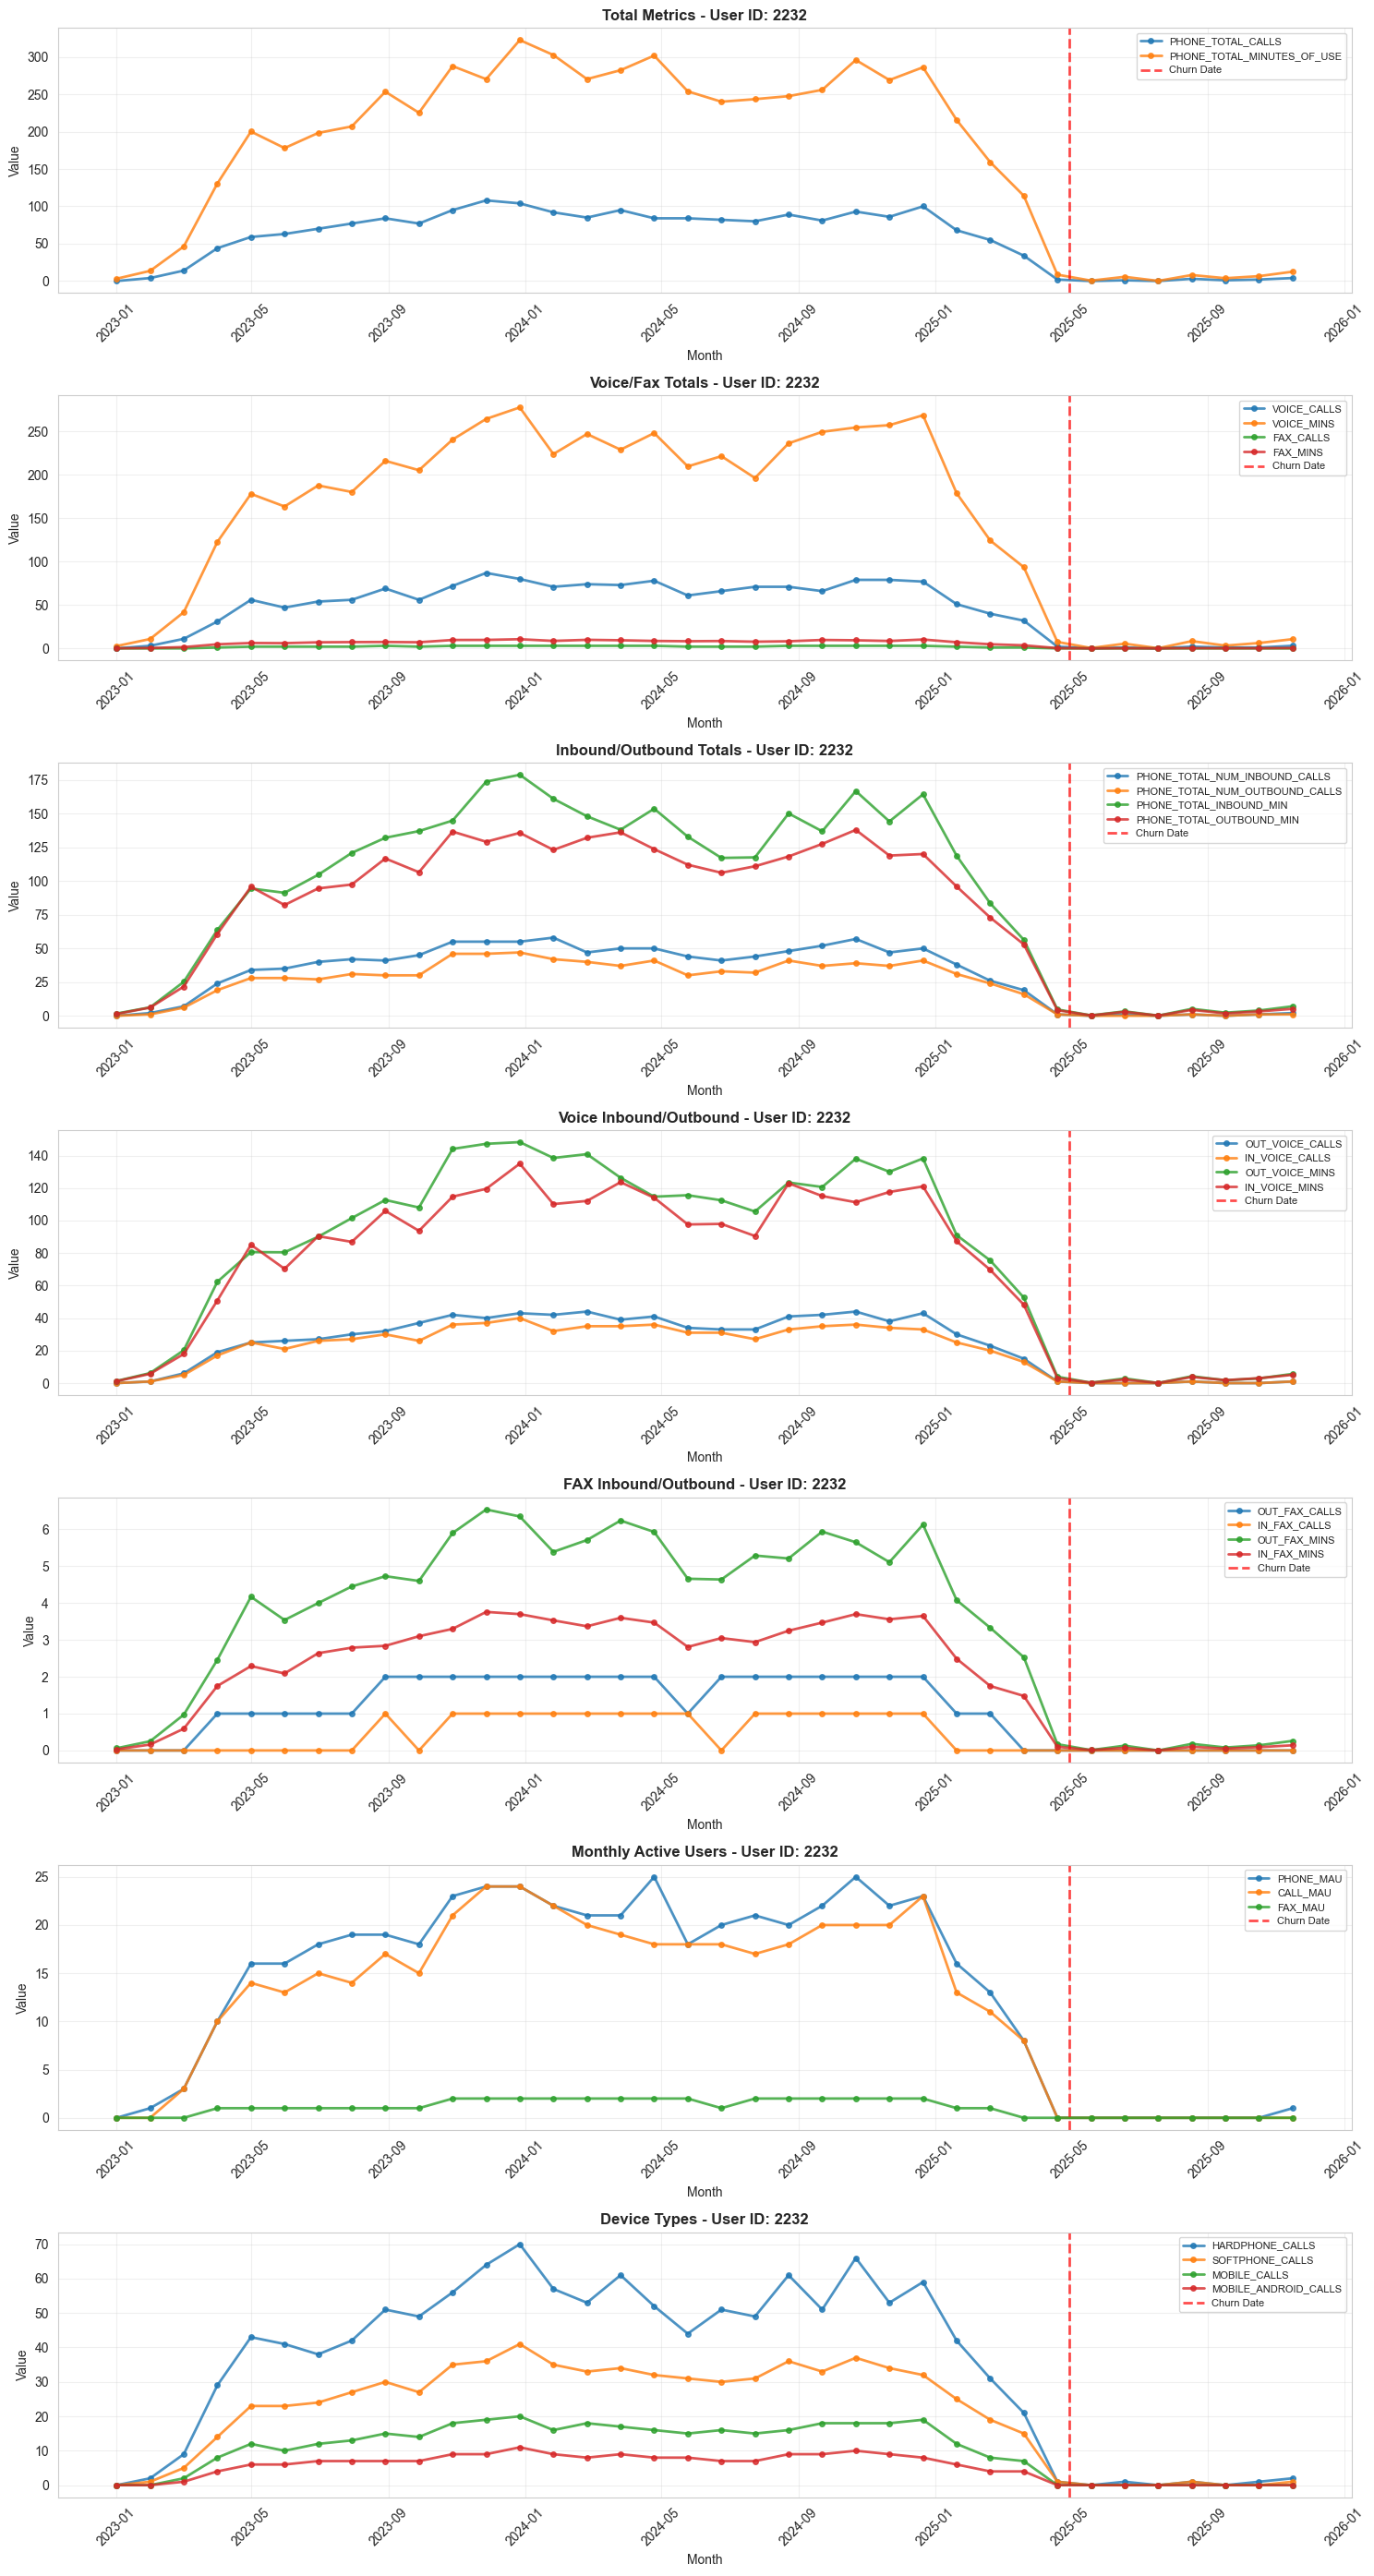


Time Series Summary for USERID: 2232
Date Range: 2023-01-01 to 2025-11-16
Number of Months: 36
Status: CHURNED (Churn Date: 2025-05-01)

Average Usage Metrics:
USERID                        2232.000000
PHONE_TOTAL_MINUTES_OF_USE     170.047778
VOICE_MINS                     149.262778
PHONE_TOTAL_INBOUND_MIN         91.437778
OUT_VOICE_MINS                  79.108611
PHONE_TOTAL_OUTBOUND_MIN        77.659444
IN_VOICE_MINS                   70.425833
PHONE_TOTAL_CALLS               56.111111
VOICE_CALLS                     45.027778
HARDPHONE_CALLS                 34.750000


In [11]:
# Show the first churned account
if 'churn_df' in globals() and not churn_df.empty:
    print(f"Total churned accounts: {len(churn_df)}")
    print(f"\nShowing first churned account:\n")
    churned_account_data = show_churned_account(account_index=0, account_df=account_df, usage_df=usage_df, churn_df=churn_df)
else:
    print("No churn data available. Run generate_all_tables() first.")

In [12]:
# Show all churned accounts summary
if 'churn_df' in globals() and 'account_df' in globals() and not churn_df.empty:
    print("="*70)
    print("ALL CHURNED ACCOUNTS SUMMARY")
    print("="*70)
    print(f"\nTotal Churned Accounts: {len(churn_df)}")
    print(f"\nChurned Accounts List:")
    print("-"*70)
    
    for idx, row in churn_df.iterrows():
        user_id = row['USERID']
        churn_date = pd.to_datetime(row['CHURN_DATE'])
        
        # Get account info
        account_info = account_df[account_df['SERVICE_ACCOUNT_ID'] == user_id]
        company = "N/A"
        if not account_info.empty:
            latest = account_info.sort_values('MONTH').iloc[-1]
            company = latest.get('COMPANY', 'N/A')
        
        # Get usage stats
        user_usage = usage_df[usage_df['USERID'] == user_id] if 'usage_df' in globals() else pd.DataFrame()
        avg_calls = user_usage['PHONE_TOTAL_CALLS'].mean() if not user_usage.empty else 0
        
        print(f"{idx + 1:2d}. USERID: {user_id:6d} | Company: {company:30s} | ")
        print(f"     Churn Date: {churn_date.strftime('%Y-%m-%d')} | Avg Calls: {avg_calls:.1f}")
    
    print("\n" + "="*70)
    print("To view details for a specific churned account, use:")
    print("  show_churned_account(account_index=0, account_df=account_df, usage_df=usage_df, churn_df=churn_df)  # First churned account")
    print("  show_churned_account(account_index=1, account_df=account_df, usage_df=usage_df, churn_df=churn_df)  # Second churned account")
    print("  etc...")
    print("\nOr use:")
    print("  plot_user_timeseries(user_id=<USERID>, usage_df=usage_df, churn_df=churn_df if 'churn_df' in globals() else None)  # Plot any user's time series")
else:
    print("Churn data or Account DataFrame not available.")

ALL CHURNED ACCOUNTS SUMMARY

Total Churned Accounts: 8

Churned Accounts List:
----------------------------------------------------------------------
 1. USERID:   2232 | Company: Advanced Technologies          | 
     Churn Date: 2025-05-01 | Avg Calls: 56.1
 2. USERID:   2882 | Company: Enterprise Partners            | 
     Churn Date: 2025-06-01 | Avg Calls: 110.0
 3. USERID:   2894 | Company: Strategic Ventures             | 
     Churn Date: 2025-09-01 | Avg Calls: 66.1
 4. USERID:   3749 | Company: Prime Business Group           | 
     Churn Date: 2025-05-01 | Avg Calls: 105.5
 5. USERID:   4115 | Company: Smart Solutions Corp           | 
     Churn Date: 2025-05-01 | Avg Calls: 55.7
 6. USERID:   7054 | Company: Enterprise Partners            | 
     Churn Date: 2025-07-01 | Avg Calls: 61.3
 7. USERID:   8172 | Company: Advanced Technologies          | 
     Churn Date: 2025-02-01 | Avg Calls: 87.4
 8. USERID:   8673 | Company: Innovation Systems             | 
     Churn Da

## Find Non-Active Accounts

Find and display all accounts with non-active status (Suspended or Closed).

In [13]:
# Find all non-active accounts
if 'account_df' in globals():
    non_active_accounts_df = find_non_active_accounts(account_df=account_df, show_details=True)
else:
    print("Account DataFrame not available. Run generate_all_tables() first.")

NON-ACTIVE ACCOUNTS SUMMARY

Total Non-Active Accounts: 8

Status Breakdown:
  Suspended: 6 records
  Closed: 2 records

NON-ACTIVE ACCOUNT DETAILS

8 Non-Active Accounts:
----------------------------------------------------------------------

7. SERVICE ACCOUNT ID: 8172
   Enterprise Account ID: 65
   Company: Advanced Technologies
   Status: Suspended
   Account Start Date: 2025-02-01
   Non-Active Date: 2025-02-01
   Months Active: 1
   Package: Basic Package
   Tier: Platinum
   Brand: Brand Epsilon
   External Account ID: EXT-00000065

1. SERVICE ACCOUNT ID: 2232
   Enterprise Account ID: 28
   Company: Advanced Technologies
   Status: Suspended
   Account Start Date: 2025-05-01
   Non-Active Date: 2025-05-01
   Months Active: 1
   Package: Basic Package
   Tier: Gold
   Brand: Brand Alpha
   External Account ID: EXT-00000028

4. SERVICE ACCOUNT ID: 3749
   Enterprise Account ID: 48
   Company: Prime Business Group
   Status: Closed
   Account Start Date: 2025-05-01
   Non-Active 

In [14]:
# Compare non-active accounts with churned accounts
if 'account_df' in globals() and 'churn_df' in globals():
    # Get non-active accounts
    non_active = find_non_active_accounts(account_df=account_df, show_details=False)
    
    if not non_active.empty and not churn_df.empty:
        non_active_user_ids = set(non_active['SERVICE_ACCOUNT_ID'].unique())
        churned_user_ids = set(churn_df['USERID'].unique())
        
        print("="*70)
        print("NON-ACTIVE vs CHURNED ACCOUNTS COMPARISON")
        print("="*70)
        print(f"\nTotal Non-Active Accounts: {len(non_active_user_ids)}")
        print(f"Total Churned Accounts (in churn_df): {len(churned_user_ids)}")
        print(f"\nOverlap:")
        overlap = non_active_user_ids.intersection(churned_user_ids)
        print(f"  Accounts that are both non-active AND in churn_df: {len(overlap)}")
        
        only_non_active = non_active_user_ids - churned_user_ids
        only_churned = churned_user_ids - non_active_user_ids
        
        print(f"\n  Only non-active (not in churn_df): {len(only_non_active)}")
        print(f"  Only in churn_df (not non-active): {len(only_churned)}")
        
        if overlap:
            print(f"\n\nOverlapping Accounts (both non-active and churned):")
            for user_id in sorted(overlap):
                status = non_active[non_active['SERVICE_ACCOUNT_ID'] == user_id]['SA_ACCT_STATUS'].iloc[0]
                churn_info = churn_df[churn_df['USERID'] == user_id]
                churn_date = pd.to_datetime(churn_info.iloc[0]['CHURN_DATE']).strftime('%Y-%m-%d') if not churn_info.empty else 'N/A'
                print(f"  USERID: {user_id}, Status: {status}, Churn Date: {churn_date}")
    else:
        print("No non-active accounts or churn data available.")
else:
    print("Account DataFrame or Churn DataFrame not available.")

NON-ACTIVE ACCOUNTS SUMMARY

Total Non-Active Accounts: 8

Status Breakdown:
  Suspended: 6 records
  Closed: 2 records
NON-ACTIVE vs CHURNED ACCOUNTS COMPARISON

Total Non-Active Accounts: 8
Total Churned Accounts (in churn_df): 8

Overlap:
  Accounts that are both non-active AND in churn_df: 8

  Only non-active (not in churn_df): 0
  Only in churn_df (not non-active): 0


Overlapping Accounts (both non-active and churned):
  USERID: 2232, Status: Suspended, Churn Date: 2025-05-01
  USERID: 2882, Status: Closed, Churn Date: 2025-06-01
  USERID: 2894, Status: Suspended, Churn Date: 2025-09-01
  USERID: 3749, Status: Closed, Churn Date: 2025-05-01
  USERID: 4115, Status: Suspended, Churn Date: 2025-05-01
  USERID: 7054, Status: Suspended, Churn Date: 2025-07-01
  USERID: 8172, Status: Suspended, Churn Date: 2025-02-01
  USERID: 8673, Status: Suspended, Churn Date: 2025-09-01


#### Example: Plot a specific user's time series

Plotting time series for USERID: 1035


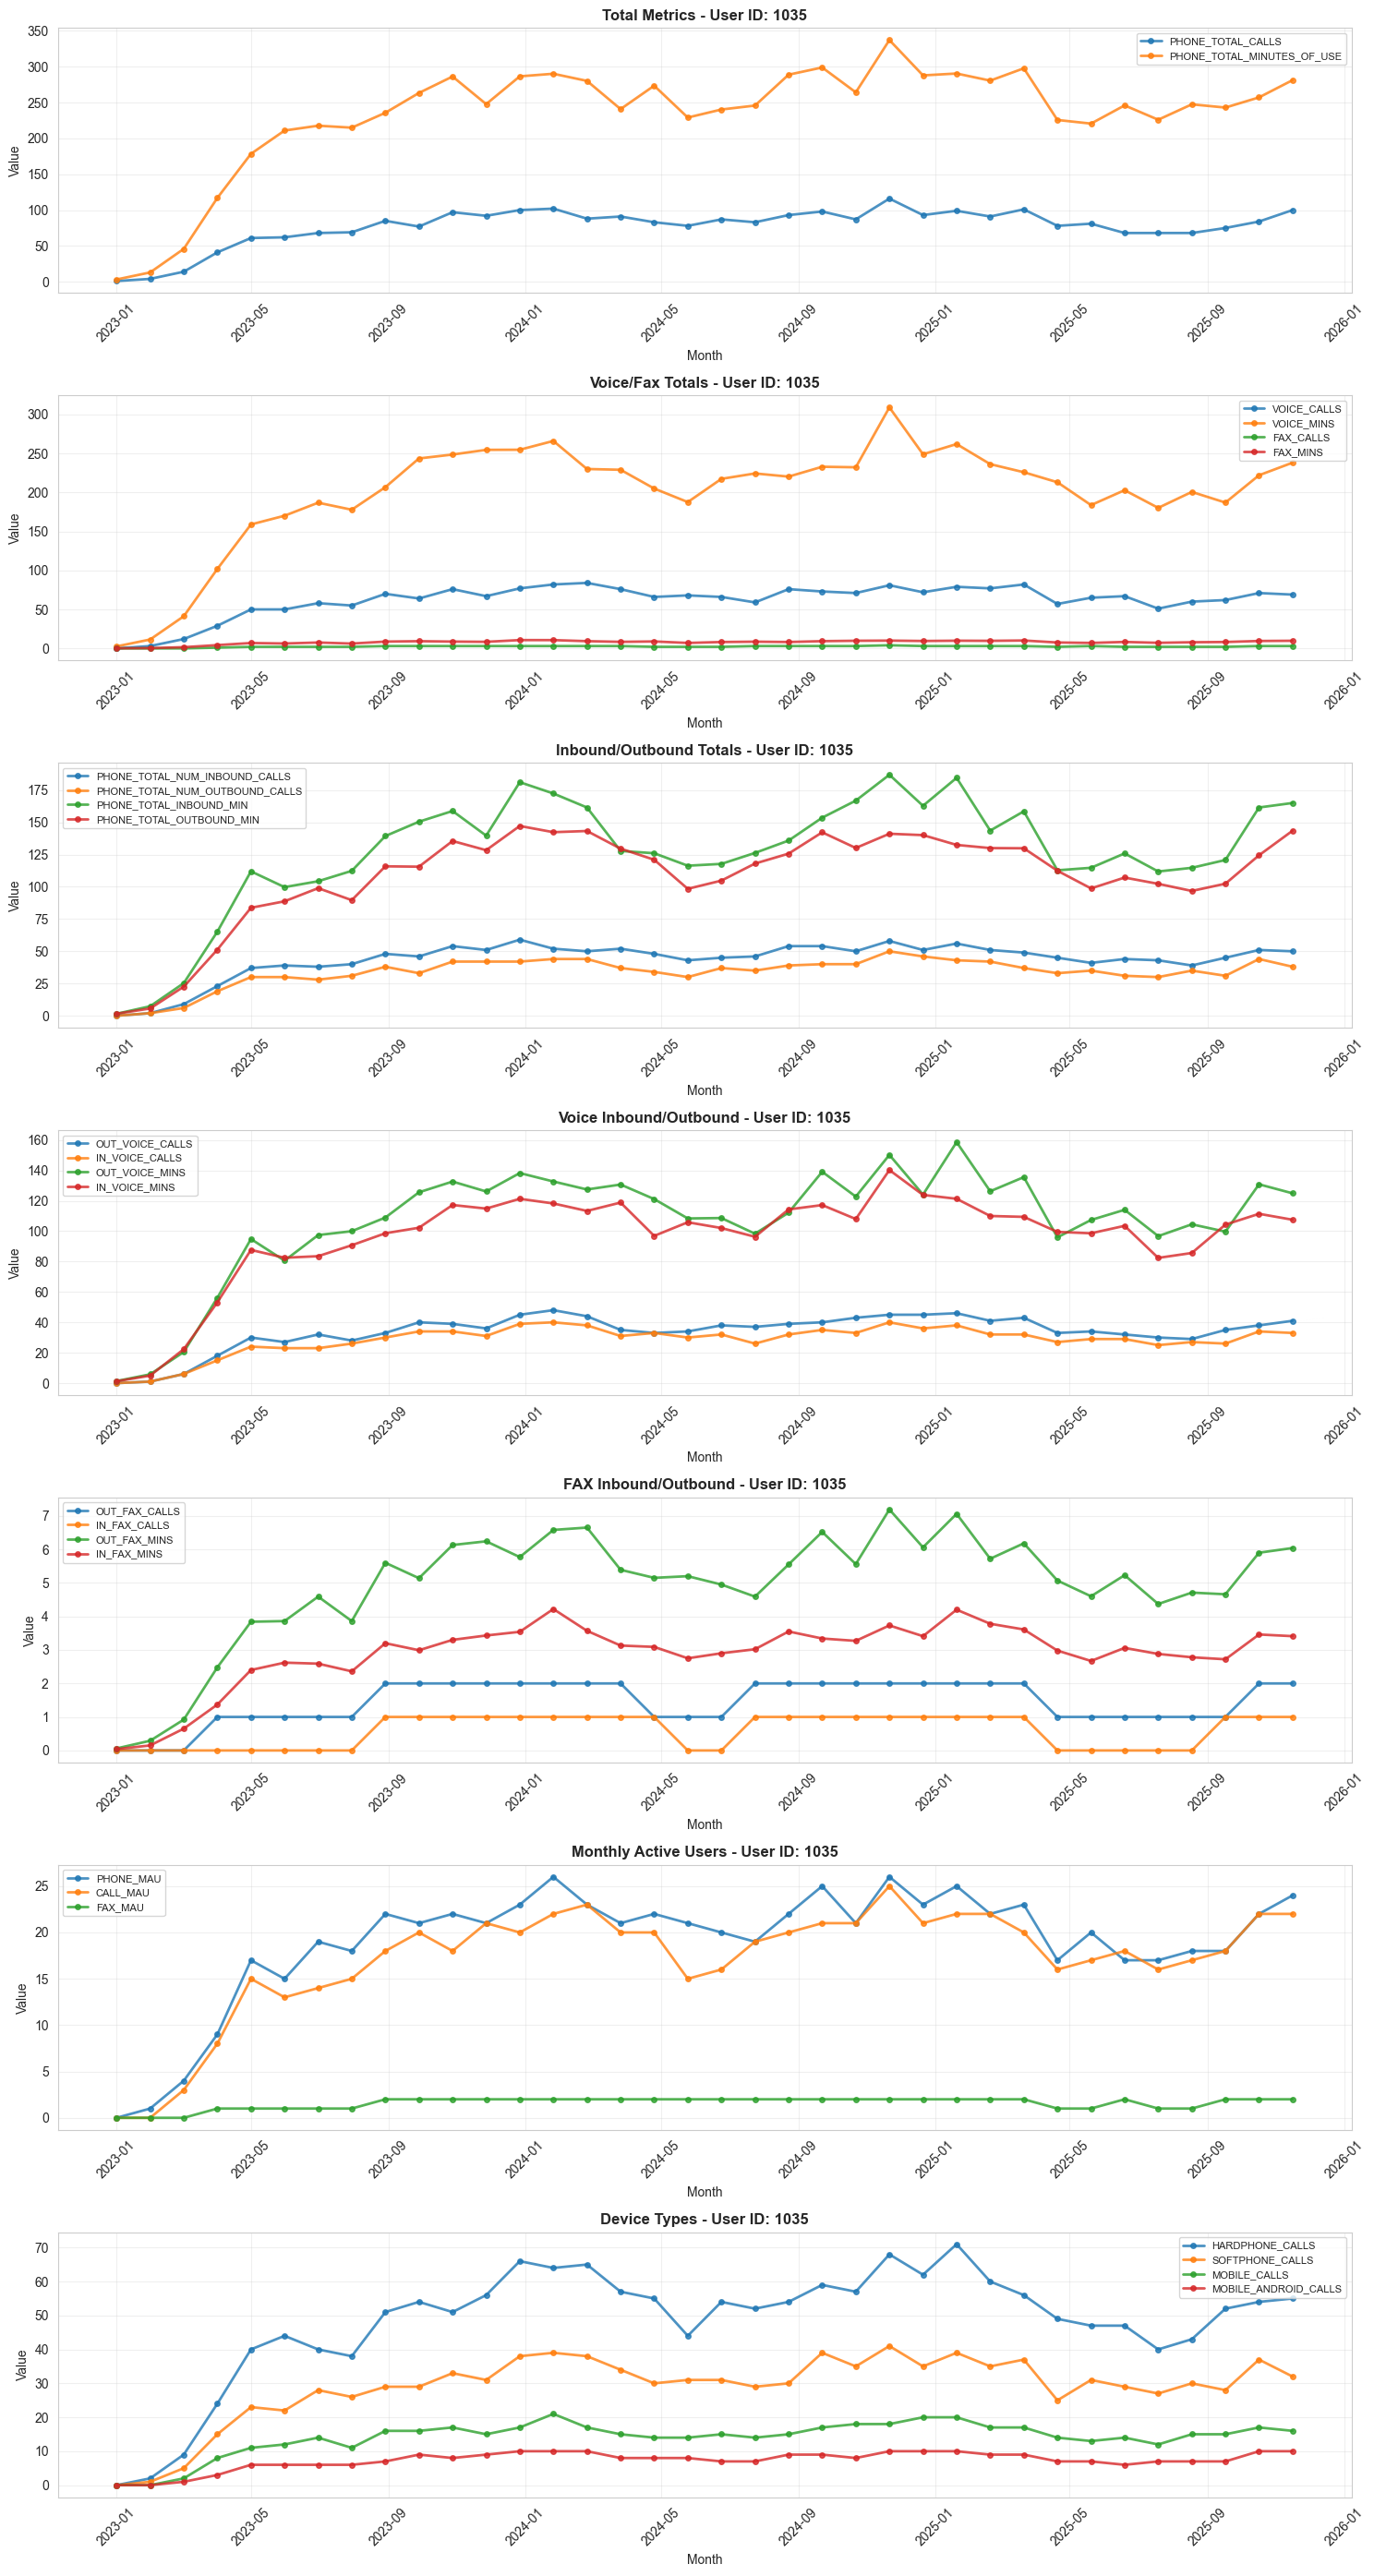


Time Series Summary for USERID: 1035
Date Range: 2023-01-01 to 2025-11-16
Number of Months: 36
Status: ACTIVE

Average Usage Metrics:
USERID                        1035.000000
PHONE_TOTAL_MINUTES_OF_USE     233.692500
VOICE_MINS                     200.448056
PHONE_TOTAL_INBOUND_MIN        126.823611
PHONE_TOTAL_OUTBOUND_MIN       108.389167
OUT_VOICE_MINS                 107.167778
IN_VOICE_MINS                   96.357500
PHONE_TOTAL_CALLS               77.305556
VOICE_CALLS                     61.805556
HARDPHONE_CALLS                 48.333333


In [15]:
# Example 1: Plot the first user in the dataset
if 'usage_df' in globals() and not usage_df.empty:
    sample_user_id = usage_df['USERID'].iloc[0]
    print(f"Plotting time series for USERID: {sample_user_id}")
    user_data = plot_user_timeseries(sample_user_id, usage_df=usage_df, churn_df=churn_df if 'churn_df' in globals() else None)
else:
    print("Usage DataFrame not available. Run generate_all_tables() first.")

CHURNED ACCOUNT DETAILS - USERID: 2232

📋 Account Information:
  Enterprise Account ID: 28
  Service Account ID: 2232
  Company: Advanced Technologies
  Package: Basic Package (Catalog Basic)
  Tier: Gold (Gold Edition)
  Brand: Brand Alpha
  Account Status: Suspended
  External Account ID: EXT-00000028
  BAN: BAN-550664
  OPCO ID: OPCO-002


📅 Churn Information:
  Churn Date: 2025-05-01
  Churn Status: 1


📊 Usage Statistics:
  Total Months of Data: 36
  Date Range: 2023-01-01 to 2025-11-16

  Average Metrics:
    Total Calls: 56.11
    Total Minutes: 170.05
    Voice Calls: 45.03
    Voice Minutes: 149.26


📈 Generating Usage Time Series Plot...


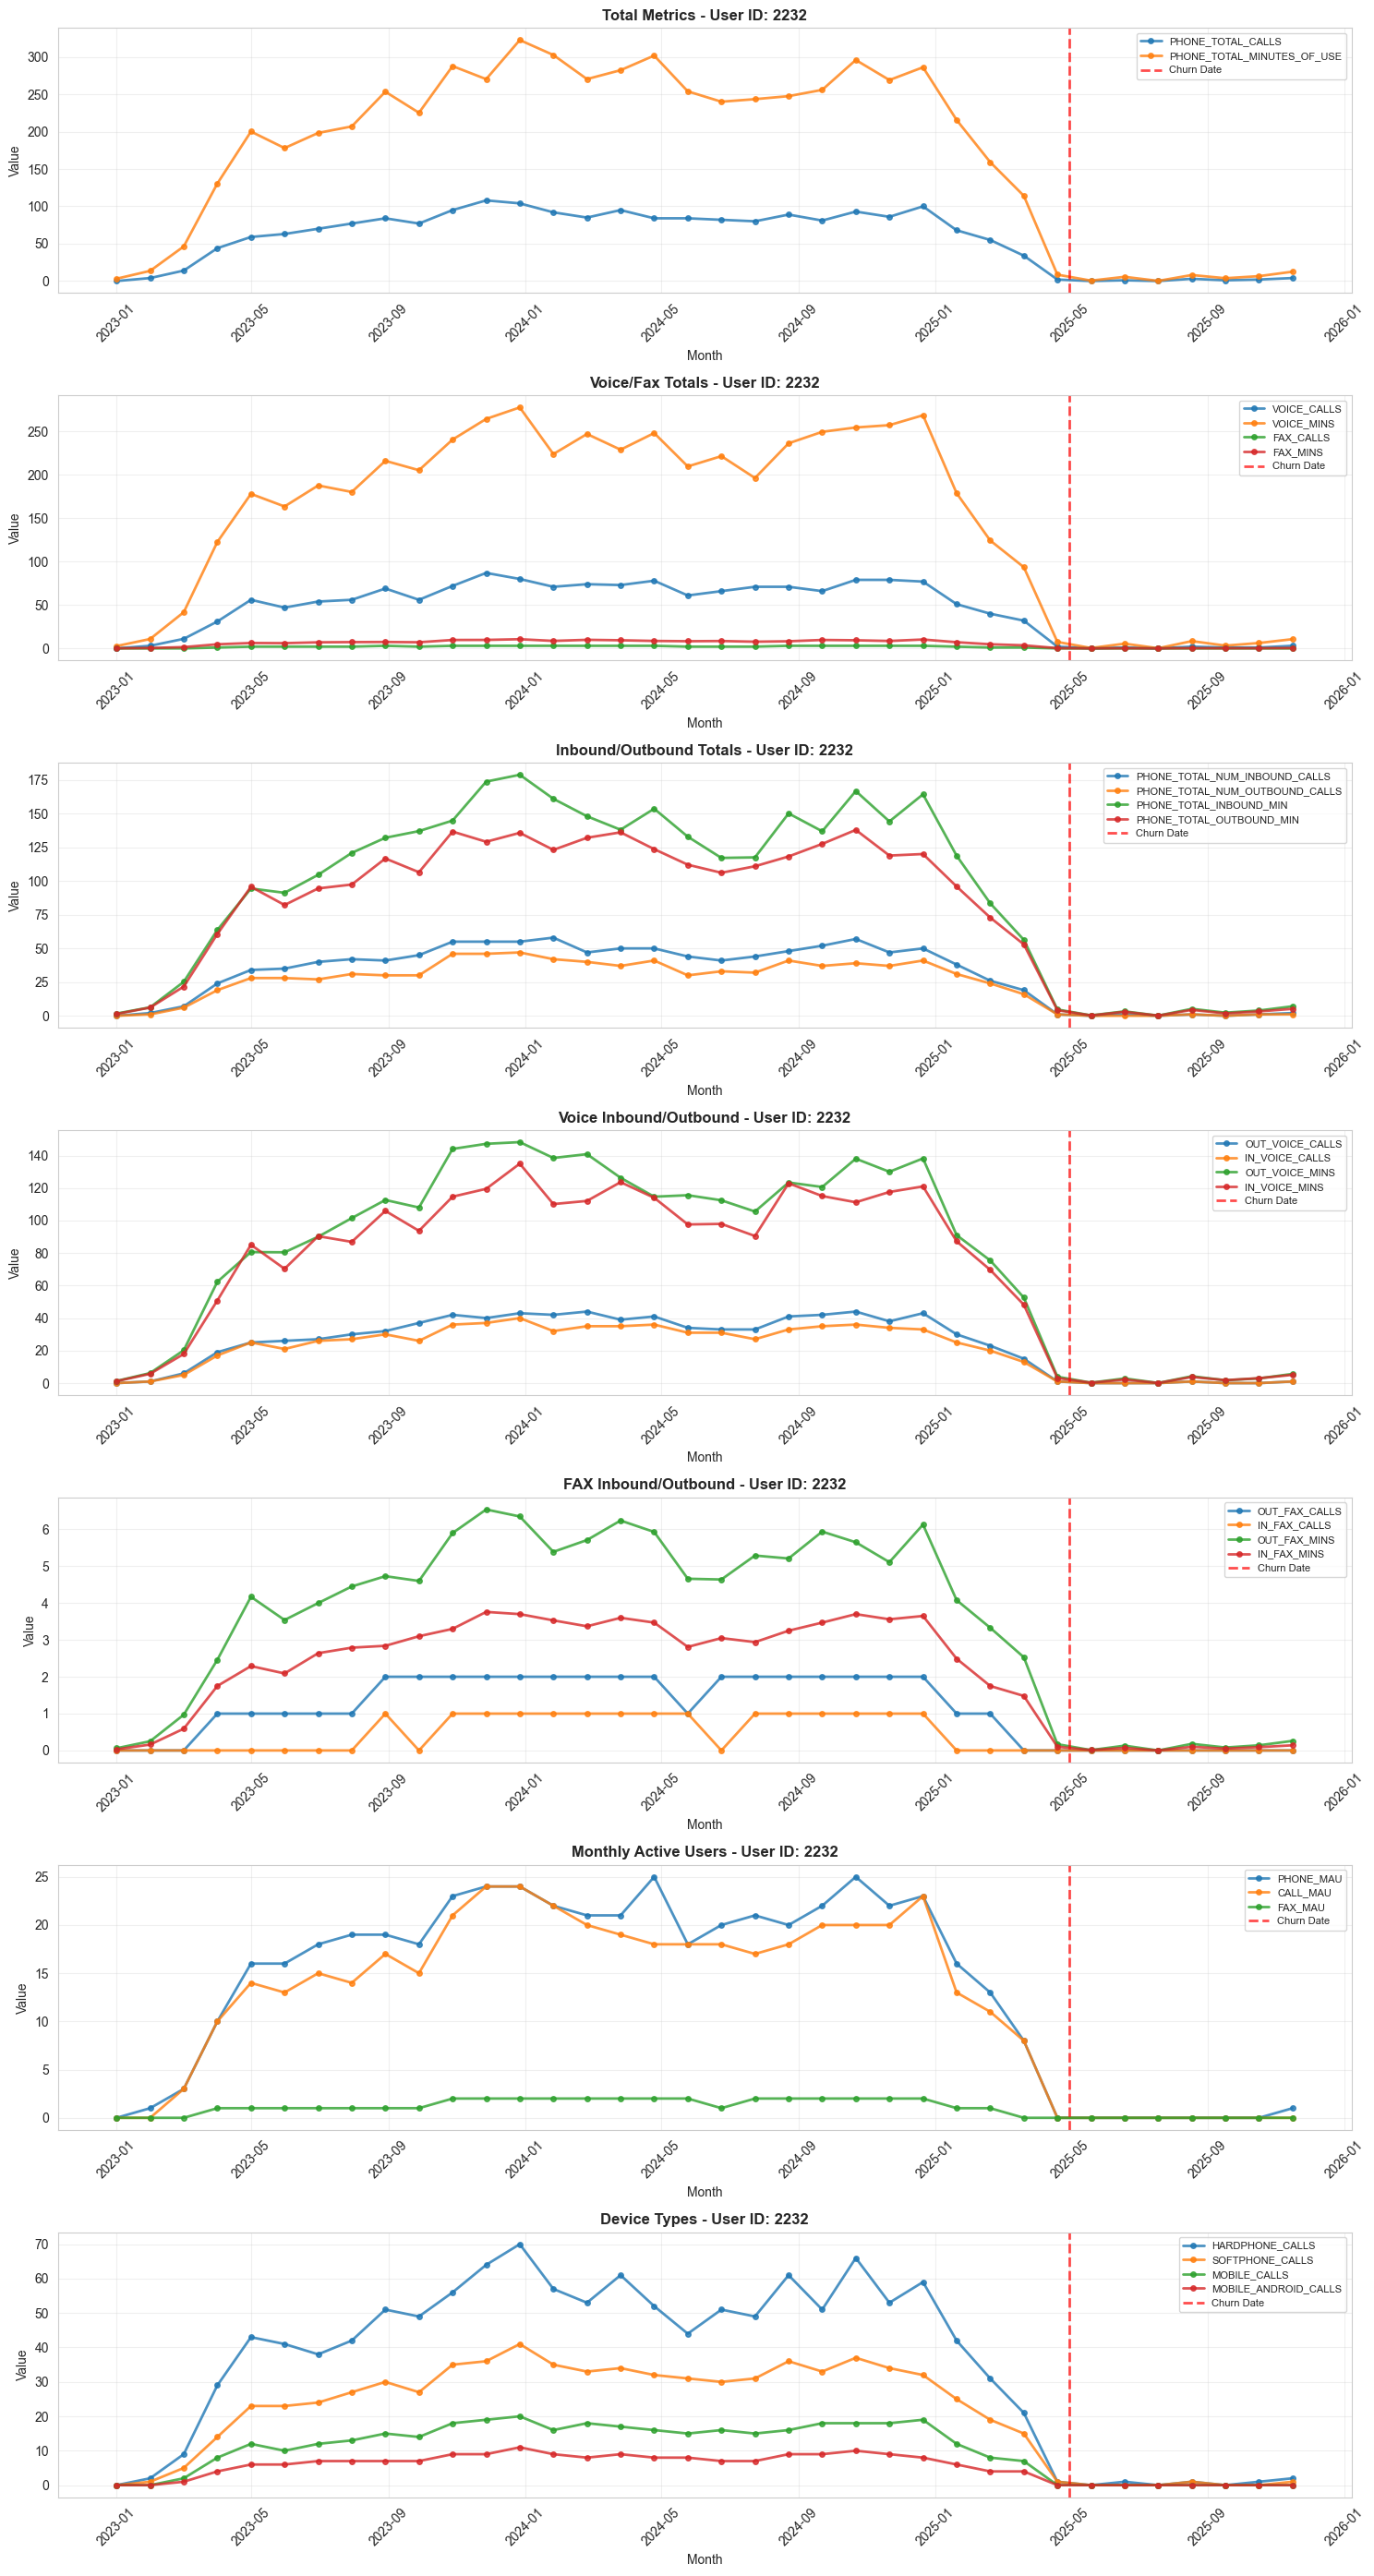


Time Series Summary for USERID: 2232
Date Range: 2023-01-01 to 2025-11-16
Number of Months: 36
Status: CHURNED (Churn Date: 2025-05-01)

Average Usage Metrics:
USERID                        2232.000000
PHONE_TOTAL_MINUTES_OF_USE     170.047778
VOICE_MINS                     149.262778
PHONE_TOTAL_INBOUND_MIN         91.437778
OUT_VOICE_MINS                  79.108611
PHONE_TOTAL_OUTBOUND_MIN        77.659444
IN_VOICE_MINS                   70.425833
PHONE_TOTAL_CALLS               56.111111
VOICE_CALLS                     45.027778
HARDPHONE_CALLS                 34.750000


{'user_id': np.int64(2232),
 'churn_date': Timestamp('2025-05-01 00:00:00'),
 'account_info':          MONTH  ENTERPRISE_ACCOUNT_ID                COMPANY  EA_BRAND_ID  \
 196 2024-05-01                     28  Advanced Technologies            1   
 197 2024-06-01                     28  Advanced Technologies            1   
 198 2024-07-01                     28  Advanced Technologies            1   
 199 2024-08-01                     28  Advanced Technologies            1   
 200 2024-09-01                     28  Advanced Technologies            1   
 201 2024-10-01                     28  Advanced Technologies            1   
 202 2024-11-01                     28  Advanced Technologies            1   
 203 2024-12-01                     28  Advanced Technologies            1   
 204 2025-01-01                     28  Advanced Technologies            1   
 205 2025-02-01                     28  Advanced Technologies            1   
 206 2025-03-01                     28  Advanced 

In [16]:
show_churned_account(account_index=0, account_df=account_df, usage_df=usage_df, churn_df=churn_df)


Plotting time series for CHURNED USERID: 2232


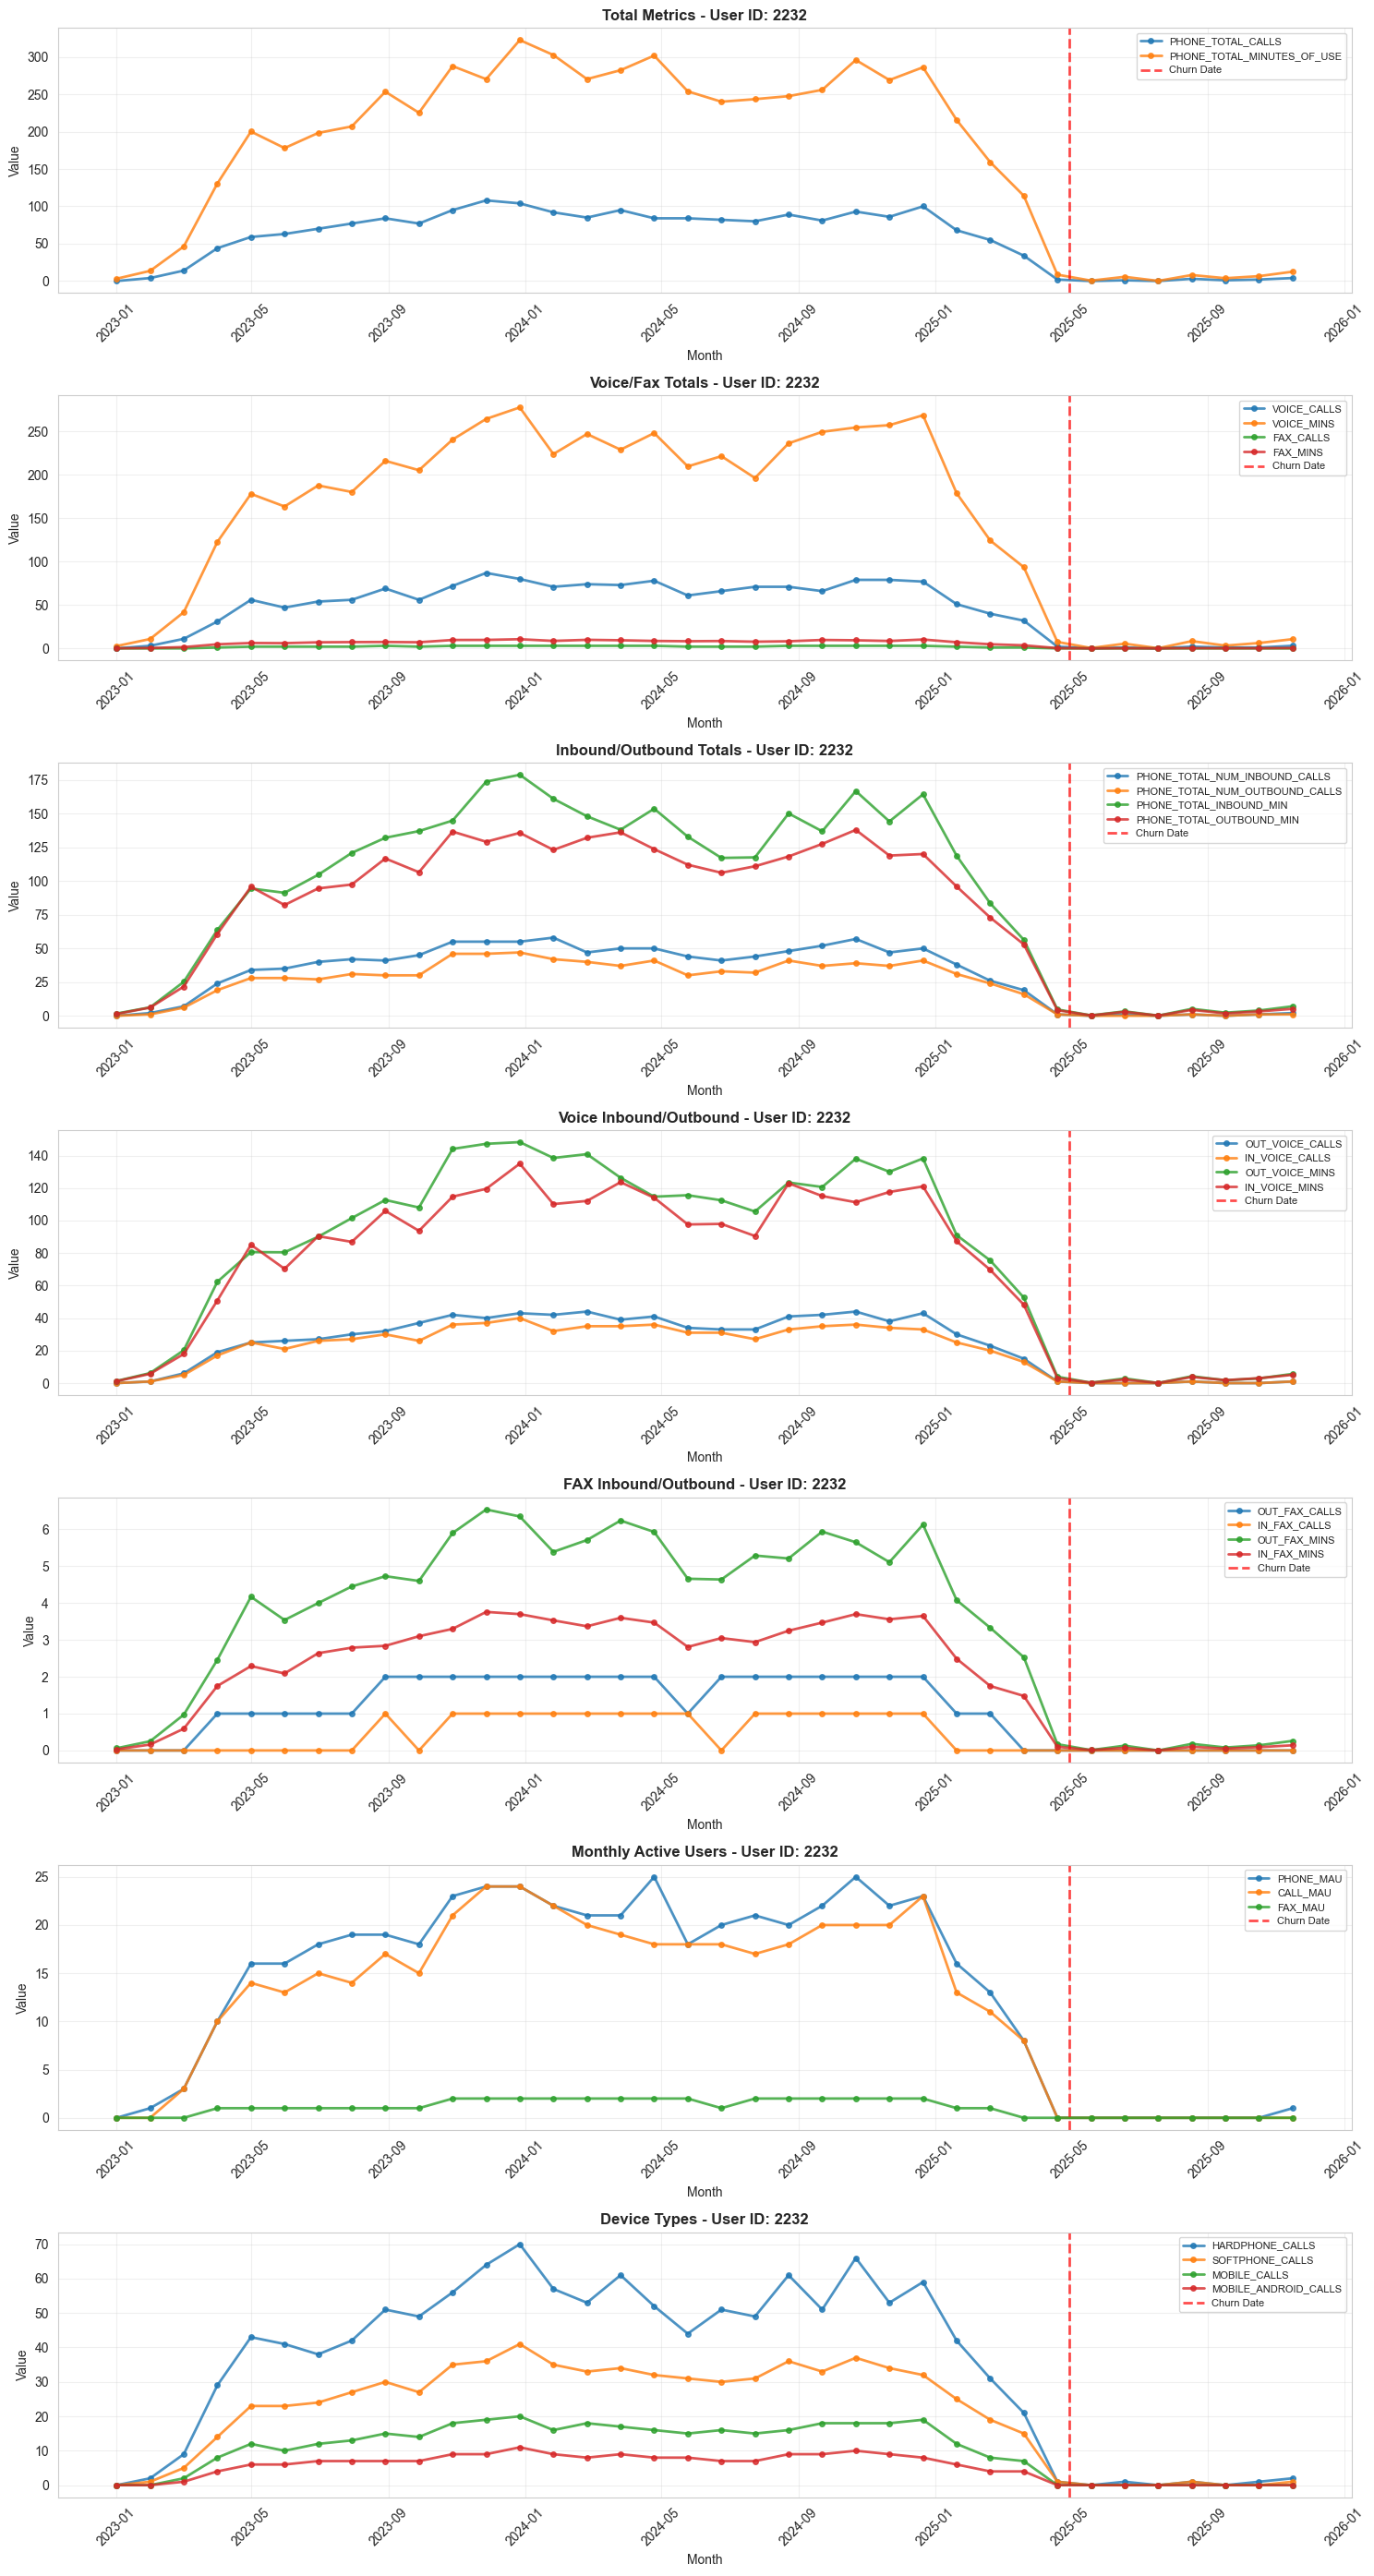


Time Series Summary for USERID: 2232
Date Range: 2023-01-01 to 2025-11-16
Number of Months: 36
Status: CHURNED (Churn Date: 2025-05-01)

Average Usage Metrics:
USERID                        2232.000000
PHONE_TOTAL_MINUTES_OF_USE     170.047778
VOICE_MINS                     149.262778
PHONE_TOTAL_INBOUND_MIN         91.437778
OUT_VOICE_MINS                  79.108611
PHONE_TOTAL_OUTBOUND_MIN        77.659444
IN_VOICE_MINS                   70.425833
PHONE_TOTAL_CALLS               56.111111
VOICE_CALLS                     45.027778
HARDPHONE_CALLS                 34.750000


In [17]:
# Example 2: Plot a churned user's time series (if available)
if 'churn_df' in globals() and not churn_df.empty and 'usage_df' in globals():
    if not churn_df.empty:
        churned_user_id = churn_df['USERID'].iloc[0]
        print(f"Plotting time series for CHURNED USERID: {churned_user_id}")
        user_data = plot_user_timeseries(churned_user_id, usage_df=usage_df, churn_df=churn_df if 'churn_df' in globals() else None)
    else:
        print("No churned users found.")
else:
    print("Churn data or Usage DataFrame not available.")

In [18]:
# Example 3: Interactive - Plot any user ID
# Uncomment and modify the user_id to plot a specific user
# user_id_to_plot = 1234  # Change this to any USERID
# plot_user_timeseries(user_id_to_plot, usage_df=usage_df, churn_df=churn_df if 'churn_df' in globals() else None)

### 1. Overall Usage Trends Over Time

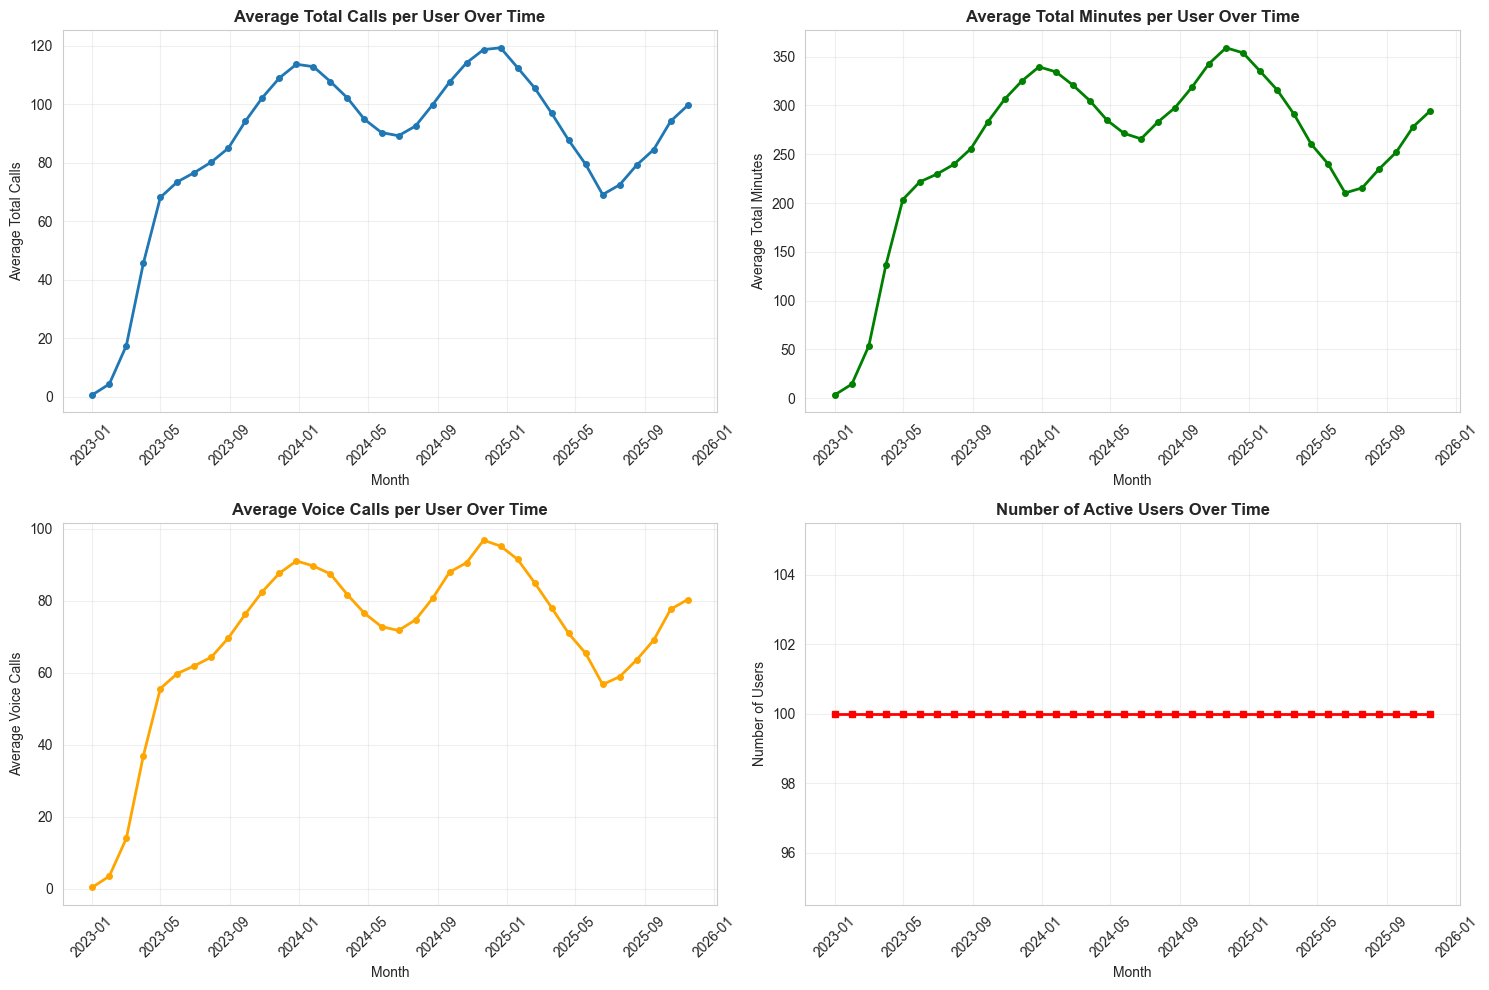


Usage Trends Summary:
Period: 2023-01 to 2025-11
Average calls per user: 86.09
Average minutes per user: 257.69


In [19]:
# Aggregate usage data by month
monthly_usage = usage_df.groupby('MONTH').agg({
    'PHONE_TOTAL_CALLS': 'mean',
    'PHONE_TOTAL_MINUTES_OF_USE': 'mean',
    'VOICE_CALLS': 'mean',
    'USERID': 'count'  # Number of users
}).reset_index()

# Plot overall trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Total calls trend
axes[0, 0].plot(monthly_usage['MONTH'], monthly_usage['PHONE_TOTAL_CALLS'], marker='o', linewidth=2, markersize=4)
axes[0, 0].set_title('Average Total Calls per User Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Total Calls')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Total minutes trend
axes[0, 1].plot(monthly_usage['MONTH'], monthly_usage['PHONE_TOTAL_MINUTES_OF_USE'], marker='o', linewidth=2, markersize=4, color='green')
axes[0, 1].set_title('Average Total Minutes per User Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Total Minutes')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Voice calls trend
axes[1, 0].plot(monthly_usage['MONTH'], monthly_usage['VOICE_CALLS'], marker='o', linewidth=2, markersize=4, color='orange')
axes[1, 0].set_title('Average Voice Calls per User Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Voice Calls')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Number of active users
axes[1, 1].plot(monthly_usage['MONTH'], monthly_usage['USERID'], marker='s', linewidth=2, markersize=4, color='red')
axes[1, 1].set_title('Number of Active Users Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Users')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nUsage Trends Summary:")
print(f"Period: {monthly_usage['MONTH'].min().strftime('%Y-%m')} to {monthly_usage['MONTH'].max().strftime('%Y-%m')}")
print(f"Average calls per user: {monthly_usage['PHONE_TOTAL_CALLS'].mean():.2f}")
print(f"Average minutes per user: {monthly_usage['PHONE_TOTAL_MINUTES_OF_USE'].mean():.2f}")

### 2. Churn vs Non-Churn Usage Comparison

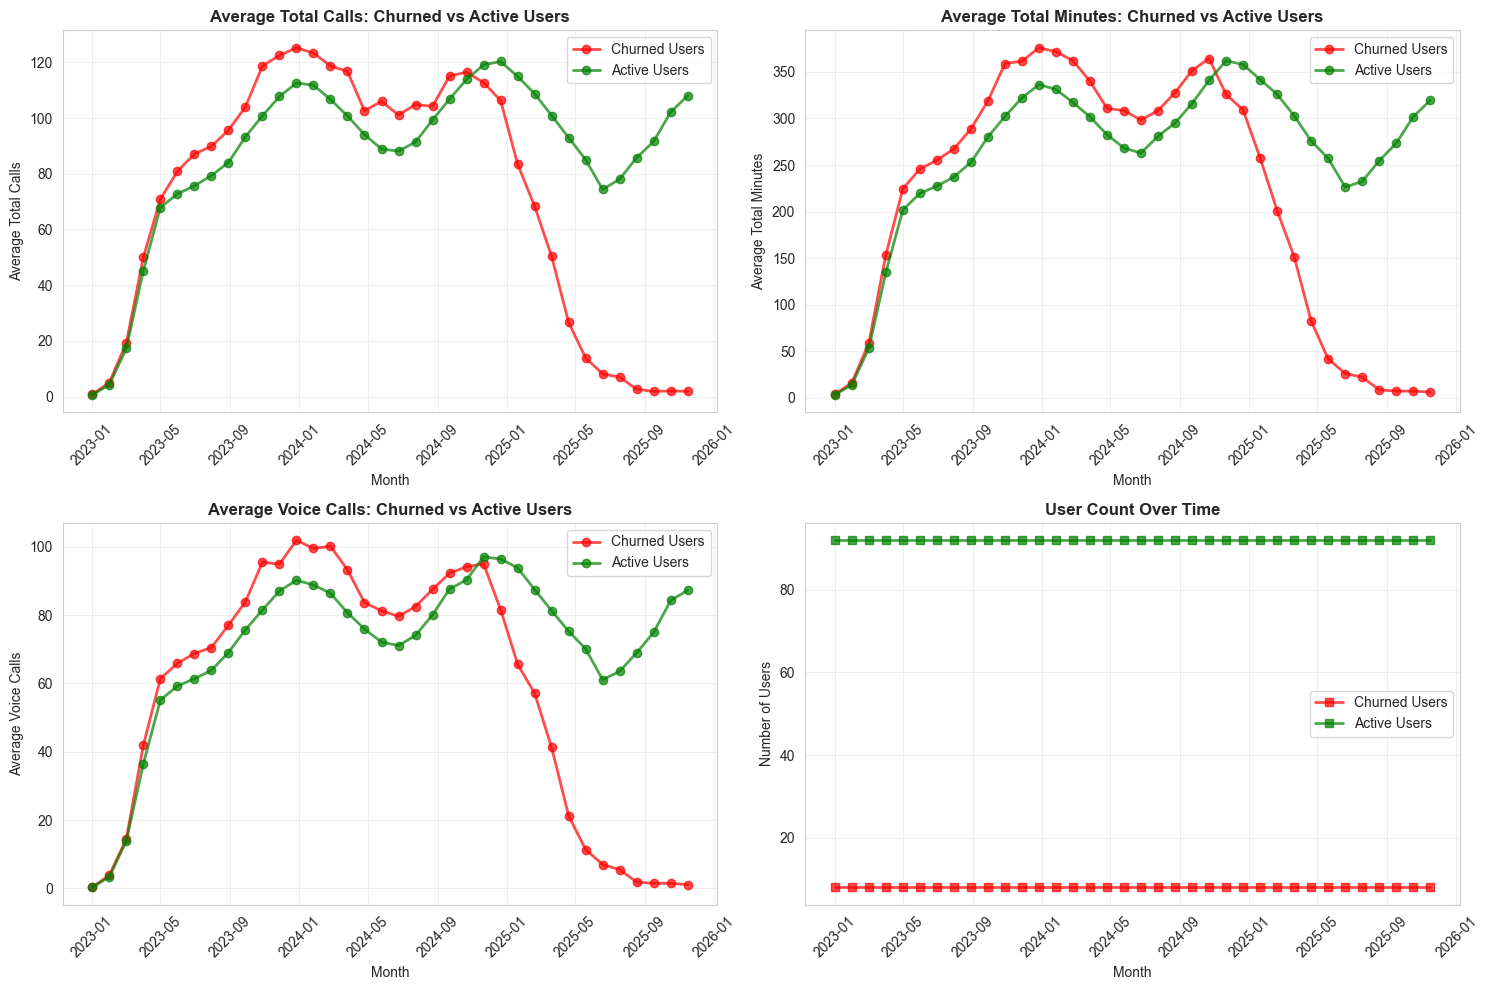

In [20]:
# Mark users as churned or not in usage_df
churned_user_ids = set()
if not churn_df.empty:
    churned_user_ids = set(churn_df['USERID'].unique())

usage_df['IS_CHURNED'] = usage_df['USERID'].isin(churned_user_ids)

# Aggregate by churn status and month
churn_comparison = usage_df.groupby(['MONTH', 'IS_CHURNED']).agg({
    'PHONE_TOTAL_CALLS': 'mean',
    'PHONE_TOTAL_MINUTES_OF_USE': 'mean',
    'VOICE_CALLS': 'mean',
    'USERID': 'count'
}).reset_index()

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Separate churned and non-churned data
churned = churn_comparison[churn_comparison['IS_CHURNED'] == True]
not_churned = churn_comparison[churn_comparison['IS_CHURNED'] == False]

# Total calls comparison
if not churned.empty:
    axes[0, 0].plot(churned['MONTH'], churned['PHONE_TOTAL_CALLS'], marker='o', linewidth=2, label='Churned Users', color='red', alpha=0.7)
if not not_churned.empty:
    axes[0, 0].plot(not_churned['MONTH'], not_churned['PHONE_TOTAL_CALLS'], marker='o', linewidth=2, label='Active Users', color='green', alpha=0.7)
axes[0, 0].set_title('Average Total Calls: Churned vs Active Users', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Total Calls')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Total minutes comparison
if not churned.empty:
    axes[0, 1].plot(churned['MONTH'], churned['PHONE_TOTAL_MINUTES_OF_USE'], marker='o', linewidth=2, label='Churned Users', color='red', alpha=0.7)
if not not_churned.empty:
    axes[0, 1].plot(not_churned['MONTH'], not_churned['PHONE_TOTAL_MINUTES_OF_USE'], marker='o', linewidth=2, label='Active Users', color='green', alpha=0.7)
axes[0, 1].set_title('Average Total Minutes: Churned vs Active Users', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Total Minutes')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Voice calls comparison
if not churned.empty:
    axes[1, 0].plot(churned['MONTH'], churned['VOICE_CALLS'], marker='o', linewidth=2, label='Churned Users', color='red', alpha=0.7)
if not not_churned.empty:
    axes[1, 0].plot(not_churned['MONTH'], not_churned['VOICE_CALLS'], marker='o', linewidth=2, label='Active Users', color='green', alpha=0.7)
axes[1, 0].set_title('Average Voice Calls: Churned vs Active Users', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Voice Calls')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# User count over time
if not churned.empty:
    axes[1, 1].plot(churned['MONTH'], churned['USERID'], marker='s', linewidth=2, label='Churned Users', color='red', alpha=0.7)
if not not_churned.empty:
    axes[1, 1].plot(not_churned['MONTH'], not_churned['USERID'], marker='s', linewidth=2, label='Active Users', color='green', alpha=0.7)
axes[1, 1].set_title('User Count Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Users')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3. Usage Decline Before Churn

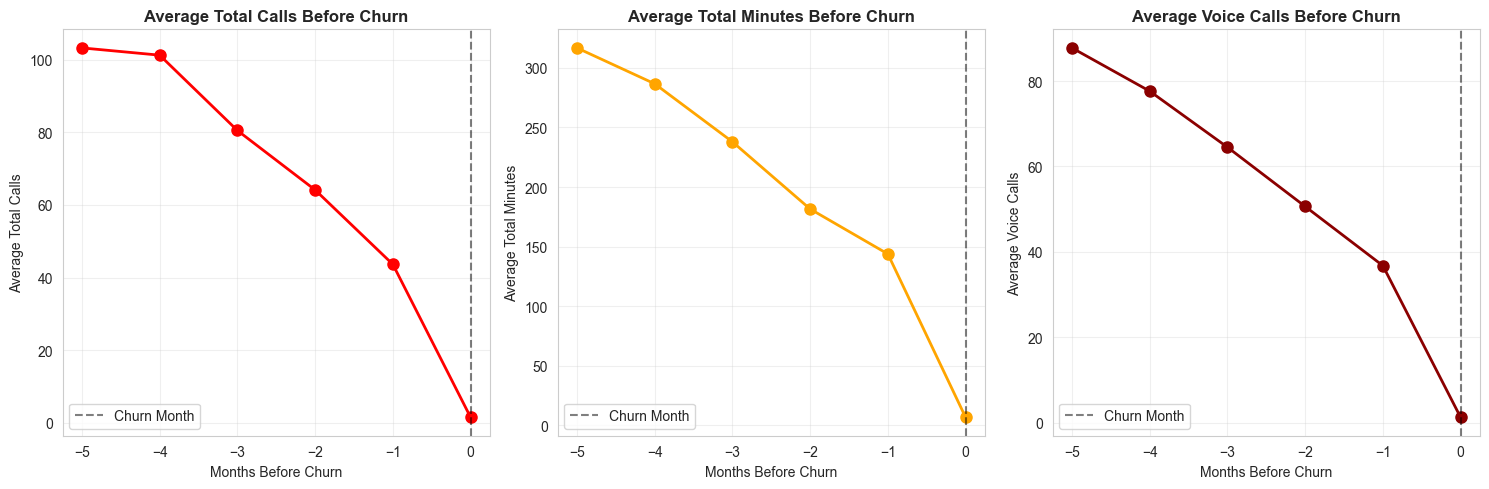


Usage Decline Analysis:
Average calls 5 months before churn: 103.25
Average calls at churn month: 1.50
Decline percentage: 98.5%


In [21]:
# Analyze usage patterns for churned users leading up to churn
if not churn_df.empty and 'account_df' in globals():
    # Get churn dates
    churn_dates = dict(zip(churn_df['USERID'], pd.to_datetime(churn_df['CHURN_DATE'])))
    
    # For each churned user, get usage in the 6 months before churn
    churned_usage_before_churn = []
    
    for user_id, churn_date in churn_dates.items():
        user_data = usage_df[usage_df['USERID'] == user_id].copy()
        user_data = user_data[user_data['MONTH'] <= churn_date].sort_values('MONTH')
        
        if len(user_data) >= 6:
            # Get last 6 months before churn
            last_6_months = user_data.tail(6).copy()
            last_6_months['MONTHS_BEFORE_CHURN'] = range(-5, 1)  # -5 to 0 (0 = churn month)
            last_6_months['USERID'] = user_id
            churned_usage_before_churn.append(last_6_months)
    
    if churned_usage_before_churn:
        before_churn_df = pd.concat(churned_usage_before_churn, ignore_index=True)
        
        # Aggregate by months before churn
        avg_before_churn = before_churn_df.groupby('MONTHS_BEFORE_CHURN').agg({
            'PHONE_TOTAL_CALLS': 'mean',
            'PHONE_TOTAL_MINUTES_OF_USE': 'mean',
            'VOICE_CALLS': 'mean'
}).reset_index()
        
        # Plot decline pattern
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Total calls decline
        axes[0].plot(avg_before_churn['MONTHS_BEFORE_CHURN'], avg_before_churn['PHONE_TOTAL_CALLS'], 
                    marker='o', linewidth=2, markersize=8, color='red')
        axes[0].set_title('Average Total Calls Before Churn', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Months Before Churn')
        axes[0].set_ylabel('Average Total Calls')
        axes[0].grid(True, alpha=0.3)
        axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Churn Month')
        axes[0].legend()
        
        # Total minutes decline
        axes[1].plot(avg_before_churn['MONTHS_BEFORE_CHURN'], avg_before_churn['PHONE_TOTAL_MINUTES_OF_USE'], 
                    marker='o', linewidth=2, markersize=8, color='orange')
        axes[1].set_title('Average Total Minutes Before Churn', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Months Before Churn')
        axes[1].set_ylabel('Average Total Minutes')
        axes[1].grid(True, alpha=0.3)
        axes[1].axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Churn Month')
        axes[1].legend()
        
        # Voice calls decline
        axes[2].plot(avg_before_churn['MONTHS_BEFORE_CHURN'], avg_before_churn['VOICE_CALLS'], 
                    marker='o', linewidth=2, markersize=8, color='darkred')
        axes[2].set_title('Average Voice Calls Before Churn', fontsize=12, fontweight='bold')
        axes[2].set_xlabel('Months Before Churn')
        axes[2].set_ylabel('Average Voice Calls')
        axes[2].grid(True, alpha=0.3)
        axes[2].axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Churn Month')
        axes[2].legend()
        
        plt.tight_layout()
        plt.show()
        
        print("\nUsage Decline Analysis:")
        print(f"Average calls 5 months before churn: {avg_before_churn.iloc[0]['PHONE_TOTAL_CALLS']:.2f}")
        print(f"Average calls at churn month: {avg_before_churn.iloc[-1]['PHONE_TOTAL_CALLS']:.2f}")
        decline_pct = ((avg_before_churn.iloc[0]['PHONE_TOTAL_CALLS'] - avg_before_churn.iloc[-1]['PHONE_TOTAL_CALLS']) / avg_before_churn.iloc[0]['PHONE_TOTAL_CALLS']) * 100
        print(f"Decline percentage: {decline_pct:.1f}%")

else:
    print("No churn data available or account_df not defined")

### 4. Churn Distribution and Timeline

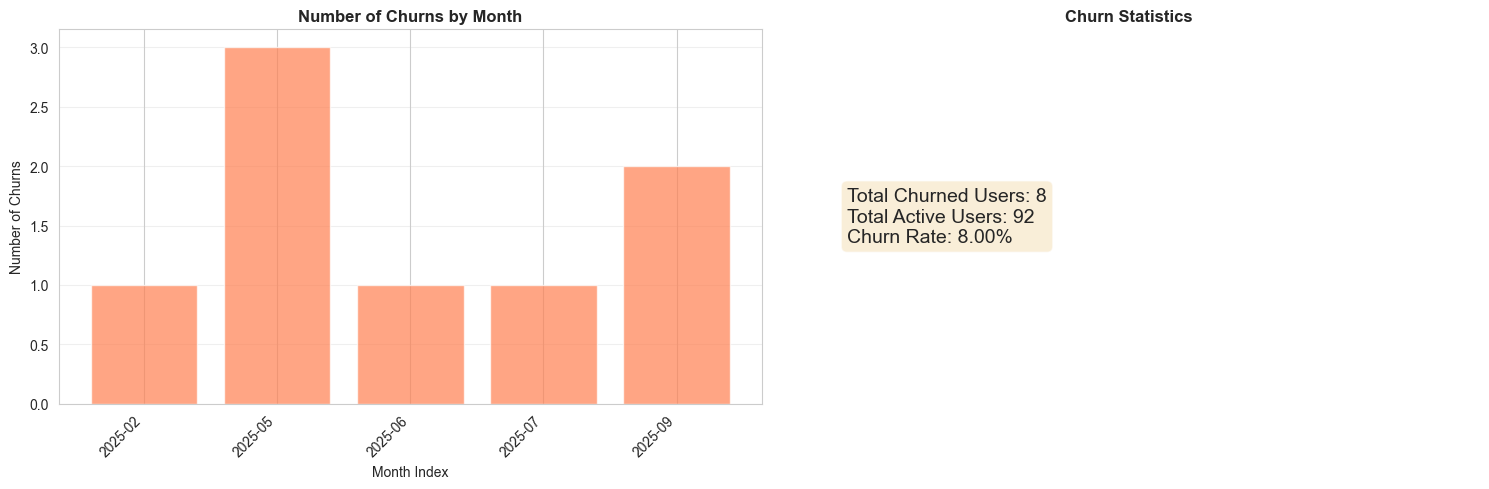


Churn Timeline:
CHURN_DATE  CHURN_COUNT
   2025-02            1
   2025-05            3
   2025-06            1
   2025-07            1
   2025-09            2


In [22]:
# Churn distribution over time
if not churn_df.empty:
    churn_df['CHURN_DATE'] = pd.to_datetime(churn_df['CHURN_DATE'])
    churn_by_month = churn_df.groupby(churn_df['CHURN_DATE'].dt.to_period('M')).size().reset_index(name='CHURN_COUNT')
    churn_by_month['CHURN_DATE'] = churn_by_month['CHURN_DATE'].astype(str)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Churn count by month
    axes[0].bar(range(len(churn_by_month)), churn_by_month['CHURN_COUNT'], color='coral', alpha=0.7)
    axes[0].set_title('Number of Churns by Month', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Month Index')
    axes[0].set_ylabel('Number of Churns')
    axes[0].set_xticks(range(len(churn_by_month)))
    axes[0].set_xticklabels(churn_by_month['CHURN_DATE'], rotation=45, ha='right')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Overall churn statistics
    churn_rate = (len(churn_df) / usage_df['USERID'].nunique()) * 100 if not usage_df.empty else 0
    
    stats_text = f"Total Churned Users: {len(churn_df)}\n"
    stats_text += f"Total Active Users: {usage_df['USERID'].nunique() - len(churn_df)}\n"
    stats_text += f"Churn Rate: {churn_rate:.2f}%"
    
    axes[1].text(0.1, 0.5, stats_text, fontsize=14, verticalalignment='center', 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[1].axis('off')
    axes[1].set_title('Churn Statistics', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nChurn Timeline:")
    print(churn_by_month.to_string(index=False))
else:
    print("No churn data available")

---

## 📚 OPTIONAL: Individual Table Generation (Advanced Usage)

**Note:** The sections below (cells 38-55) are **optional advanced workflows**.

If you've already successfully run **Cell 7** (`generate_all_tables()`), you have everything you need:
- ✅ `account_df` - Account attributes
- ✅ `usage_df` - Phone usage data  
- ✅ `churn_df` - Churn records
- ✅ All CSV files saved

**You can skip to the end** or explore these cells to understand how to generate tables individually for custom workflows.

## Test: Generate Month Sequence

Test the `generate_month_sequence` function to see how it generates month sequences.

In [23]:
# Test with 6 months
num_months = 6
months = generate_month_sequence(num_months)
print(f"Generated {len(months)} months:")
for month in months:
    print(f"  - {month.strftime('%Y-%m-%d')}")

Generated 6 months:
  - 2025-05-01
  - 2025-06-01
  - 2025-07-01
  - 2025-08-01
  - 2025-09-01
  - 2025-10-01


## Save to CSV

Save the generated records to a CSV file.

In [24]:
# Save account table to CSV using pandas
# Note: account_df should be generated first using generate_account_table() or generate_all_tables()

# If you have account_df from generate_account_table():
# account_df.to_csv('account_attributes_monthly.csv', index=False)
# print("✓ Account table saved to CSV")

# Or use the save_to_csv function with records (if you have them as a list):
# account_records = account_df.to_dict('records')
# save_to_csv(account_records, filename='account_attributes_monthly.csv')

# Example: Save if account_df exists
try:
    if 'account_df' in globals():
        account_df.to_csv('account_attributes_monthly.csv', index=False)
        print("✓ Account table saved to 'account_attributes_monthly.csv'")
    else:
        print("Note: Run generate_account_table() or generate_all_tables() first to create account_df")
except NameError:
    print("Note: Run generate_account_table() or generate_all_tables() first to create account_df")

✓ Account table saved to 'account_attributes_monthly.csv'


In [ ]:
# Verify data loaded successfully
from snowflake_loader import show_table_summary

show_table_summary()

In [ ]:
# Load all data to Snowflake
from snowflake_loader import load_all_data

# Option 1: Load from DataFrames (recommended if you just generated data)
load_all_data(
    from_dataframes=True,
    account_df=account_df,
    usage_df=usage_df,
    churn_df=churn_df,
    truncate=False  # Set to True to replace existing data
)

# Option 2: Load from CSV files
# load_all_data(from_dataframes=False, truncate=False)

In [ ]:
# Test Snowflake connection
from snowflake_loader import test_connection

# This will display your connection info if successful
test_connection()

## 🗄️ Load Data to Snowflake (Optional)

If you want to load the generated data into Snowflake, follow these steps:

### Setup:
1. Install Snowflake dependencies: `pip install snowflake-connector-python python-dotenv`
2. Copy `.env.example` to `.env`
3. Fill in your Snowflake credentials in `.env`
4. Run the cells below

### Quick Test:
Test your Snowflake connection first before loading data.

## ⚠️ OPTIONAL: Advanced Manual Workflow (Cells 44-55)

**If you've already run Cell 7 (`generate_all_tables()`), you can SKIP cells 44-55!**

The cells below demonstrate an alternative **step-by-step manual workflow** for generating data. This is useful if you want to:
- Generate tables individually with custom parameters
- Understand the internal workflow
- Integrate with existing data pipelines

**Note:** These cells require manual conversion of DataFrames to record lists, which is why they may show errors if run directly after Cell 7.

---

## Generate Churn Records from Account Data

Extract churn information from the account table.

In [25]:
# Generate churn records from account data
# First, convert account_df to a list of records
if 'account_df' in globals():
    account_records = account_df.to_dict('records')
    # Convert MONTH back to string format for the function
    for record in account_records:
        if isinstance(record['MONTH'], pd.Timestamp):
            record['MONTH'] = record['MONTH'].strftime('%Y-%m-%d')
    
    churn_records = generate_churn_records(
        account_records=account_records,
        output_filename=None  # Don't overwrite, churn_df already exists
    )
    
    # Convert to DataFrame
    churn_df_new = pd.DataFrame(churn_records)
    if not churn_df_new.empty:
        churn_df_new['CHURN_DATE'] = pd.to_datetime(churn_df_new['CHURN_DATE'])
    
    print(f"Generated {len(churn_df_new)} churn records")
    print(f"\nChurn Records DataFrame:")
    print(churn_df_new.head())
else:
    print("account_df not found. Run generate_all_tables() or generate_account_data() first.")

Generated 8 churn records

Churn Records DataFrame:
   USERID CHURN_DATE  CHURNED
0    2232 2025-05-01        1
1    2882 2025-06-01        1
2    2894 2025-09-01        1
3    3749 2025-05-01        1
4    4115 2025-05-01        1


## Generate Phone Usage Table (Pandas DataFrame)

Generate phone usage data using the churn records and convert to pandas DataFrame.

In [26]:
# Configuration for phone usage generation
num_months = 36  # 3 years of data
usage_start_date = datetime(2023, 1, 1)

# Get unique service account IDs from account data (these will be our USERIDs)
if 'account_df' in globals():
    unique_service_accounts = account_df['SERVICE_ACCOUNT_ID'].unique()
    num_users = len(unique_service_accounts)
    
    # Create a mapping of USERID to churn information
    # Use the existing churn_df if it exists, otherwise use churn_records from previous cell
    churn_dict = {}
    if 'churn_df' in globals() and not churn_df.empty:
        for _, row in churn_df.iterrows():
            churn_dict[row['USERID']] = {
                'churn_date': pd.to_datetime(row['CHURN_DATE']),
                'churned': 1
            }
    elif 'churn_records' in globals():
        for record in churn_records:
            churn_dict[record['USERID']] = {
                'churn_date': pd.to_datetime(record['CHURN_DATE']),
                'churned': 1
            }
    
    print(f"Generating usage data for {num_users} users over {num_months} months")
    print(f"Found {len(churn_dict)} churned users")
else:
    print("account_df not found. Run generate_all_tables() first.")

Generating usage data for 100 users over 36 months
Found 8 churned users


In [27]:
# Generate phone usage data for all users
all_usage_data = []

for service_account_id in unique_service_accounts:
    user_id = int(service_account_id)
    
    # Assign user profile randomly
    profile_type = random.choice(['heavy', 'medium', 'light'])
    base_values = user_profiles[profile_type]
    
    # Check if user churned
    is_churned = user_id in churn_dict
    churn_month = None
    
    if is_churned:
        # Calculate churn month relative to usage start date
        churn_date = churn_dict[user_id]['churn_date']
        months_diff = (churn_date.year - usage_start_date.year) * 12 + (churn_date.month - usage_start_date.month)
        if 0 <= months_diff < num_months:
            churn_month = months_diff
        else:
            is_churned = False  # Churn date outside our range
    
    # Generate usage data
    user_data = generate_user_usage(user_id, num_months, base_values, is_churned, churn_month)
    all_usage_data.extend(user_data)

print(f"Generated {len(all_usage_data)} usage records")

Generated 3600 usage records


In [28]:
# Convert usage data to pandas DataFrame
usage_df = pd.DataFrame(all_usage_data)

# Convert MONTH to datetime
usage_df['MONTH'] = pd.to_datetime(usage_df['MONTH'])

# Reorder columns to match the schema
column_order = [
    'USERID',
    'MONTH',
    'PHONE_TOTAL_CALLS',
    'PHONE_TOTAL_MINUTES_OF_USE',
    'VOICE_CALLS',
    'VOICE_MINS',
    'FAX_CALLS',
    'FAX_MINS',
    'PHONE_TOTAL_NUM_INBOUND_CALLS',
    'PHONE_TOTAL_NUM_OUTBOUND_CALLS',
    'PHONE_TOTAL_INBOUND_MIN',
    'PHONE_TOTAL_OUTBOUND_MIN',
    'OUT_VOICE_CALLS',
    'IN_VOICE_CALLS',
    'OUT_VOICE_MINS',
    'IN_VOICE_MINS',
    'OUT_FAX_CALLS',
    'IN_FAX_CALLS',
    'OUT_FAX_MINS',
    'IN_FAX_MINS',
    'PHONE_MAU',
    'CALL_MAU',
    'FAX_MAU',
    'HARDPHONE_CALLS',
    'SOFTPHONE_CALLS',
    'MOBILE_CALLS',
    'MOBILE_ANDROID_CALLS'
]

usage_df = usage_df[column_order]

print(f"Usage Table Shape: {usage_df.shape}")
print(f"\nUsage Table Columns: {list(usage_df.columns)}")
print(f"\nUsage Table Info:")
usage_df.info()

Usage Table Shape: (3600, 27)

Usage Table Columns: ['USERID', 'MONTH', 'PHONE_TOTAL_CALLS', 'PHONE_TOTAL_MINUTES_OF_USE', 'VOICE_CALLS', 'VOICE_MINS', 'FAX_CALLS', 'FAX_MINS', 'PHONE_TOTAL_NUM_INBOUND_CALLS', 'PHONE_TOTAL_NUM_OUTBOUND_CALLS', 'PHONE_TOTAL_INBOUND_MIN', 'PHONE_TOTAL_OUTBOUND_MIN', 'OUT_VOICE_CALLS', 'IN_VOICE_CALLS', 'OUT_VOICE_MINS', 'IN_VOICE_MINS', 'OUT_FAX_CALLS', 'IN_FAX_CALLS', 'OUT_FAX_MINS', 'IN_FAX_MINS', 'PHONE_MAU', 'CALL_MAU', 'FAX_MAU', 'HARDPHONE_CALLS', 'SOFTPHONE_CALLS', 'MOBILE_CALLS', 'MOBILE_ANDROID_CALLS']

Usage Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   USERID                          3600 non-null   int64         
 1   MONTH                           3600 non-null   datetime64[ns]
 2   PHONE_TOTAL_CALLS               3600 non-null   

In [29]:
# Display usage table statistics
print("Usage Data Summary:")
print(f"Total usage records: {len(usage_df)}")
print(f"Number of unique users: {usage_df['USERID'].nunique()}")
print(f"Date range:")
print(f"  Earliest: {usage_df['MONTH'].min()}")
print(f"  Latest: {usage_df['MONTH'].max()}")
print(f"\nAverage metrics per user per month:")
numeric_cols = usage_df.select_dtypes(include=[np.number]).columns
avg_metrics = usage_df[numeric_cols].mean()
print(avg_metrics.head(10))
print(f"\nSample Usage Data:")
usage_df.head(10)

Usage Data Summary:
Total usage records: 3600
Number of unique users: 100
Date range:
  Earliest: 2023-01-01 00:00:00
  Latest: 2025-11-16 00:00:00

Average metrics per user per month:
USERID                            5300.380000
PHONE_TOTAL_CALLS                   81.156111
PHONE_TOTAL_MINUTES_OF_USE         243.347597
VOICE_CALLS                         65.759722
VOICE_MINS                         208.857200
FAX_CALLS                            2.339444
FAX_MINS                             7.964681
PHONE_TOTAL_NUM_INBOUND_CALLS       44.283056
PHONE_TOTAL_NUM_OUTBOUND_CALLS      36.396667
PHONE_TOTAL_INBOUND_MIN            130.885681
dtype: float64

Sample Usage Data:


,USERID,MONTH,PHONE_TOTAL_CALLS,PHONE_TOTAL_MINUTES_OF_USE,VOICE_CALLS,VOICE_MINS,FAX_CALLS,FAX_MINS,PHONE_TOTAL_NUM_INBOUND_CALLS,PHONE_TOTAL_NUM_OUTBOUND_CALLS,...,IN_FAX_CALLS,OUT_FAX_MINS,IN_FAX_MINS,PHONE_MAU,CALL_MAU,FAX_MAU,HARDPHONE_CALLS,SOFTPHONE_CALLS,MOBILE_CALLS,MOBILE_ANDROID_CALLS
0,1035,2023-01-01,0,1.13,0,1.03,0,0.04,0,0,...,0,0.02,0.01,0,0,0,0,0,0,0
1,1035,2023-01-31,2,6.39,1,5.50,0,0.18,1,0,...,0,0.13,0.06,0,0,0,1,0,0,0
2,1035,2023-03-02,6,19.41,4,16.97,0,0.55,3,2,...,0,0.34,0.19,1,1,0,3,2,0,0
3,1035,2023-04-01,18,50.94,14,41.23,0,1.44,9,7,...,0,0.90,0.54,5,5,0,10,6,2,1
4,1035,2023-05-01,25,74.59,20,67.60,0,2.22,13,10,...,0,1.59,0.70,9,7,0,15,11,3,2
5,1035,2023-05-31,28,83.46,26,84.74,0,2.79,18,13,...,0,1.69,0.82,10,9,0,16,12,4,2
6,1035,2023-06-30,28,82.85,25,75.90,0,2.21,17,12,...,0,1.62,0.78,9,8,0,15,11,4,2
7,1035,2023-07-30,33,94.84,24,76.96,0,2.59,18,14,...,0,1.80,0.85,10,9,0,18,14,4,3
8,1035,2023-08-29,34,95.22,27,88.52,0,2.67,20,15,...,0,1.76,0.90,10,8,0,17,15,4,2
9,1035,2023-09-28,34,98.06,32,91.12,1,3.02,19,15,...,0,2.13,0.92,12,11,0,19,15,5,2


## Summary: Both Tables Generated

Both the Account Table and Usage Table are now available as pandas DataFrames.

In [30]:
# Summary of both tables
print("=" * 60)
print("ACCOUNT TABLE SUMMARY")
print("=" * 60)
print(f"Shape: {account_df.shape}")
print(f"Unique Enterprise Accounts: {account_df['ENTERPRISE_ACCOUNT_ID'].nunique()}")
print(f"Unique Service Accounts: {account_df['SERVICE_ACCOUNT_ID'].nunique()}")
print(f"Date Range: {account_df['MONTH'].min()} to {account_df['MONTH'].max()}")
print(f"Churned Accounts: {account_df[account_df['SA_ACCT_STATUS'].isin(['Suspended', 'Closed'])]['SERVICE_ACCOUNT_ID'].nunique()}")

print("\n" + "=" * 60)
print("USAGE TABLE SUMMARY")
print("=" * 60)
print(f"Shape: {usage_df.shape}")
print(f"Unique Users: {usage_df['USERID'].nunique()}")
print(f"Date Range: {usage_df['MONTH'].min()} to {usage_df['MONTH'].max()}")
print(f"Total Records: {len(usage_df)}")

print("\n" + "=" * 60)
print("TABLES READY FOR ANALYSIS")
print("=" * 60)
print("\nBoth tables are available as:")
print("  - account_df: Account attributes monthly data")
print("  - usage_df: Phone usage data")
print("  - churn_df: Churn records")

ACCOUNT TABLE SUMMARY
Shape: (1191, 25)
Unique Enterprise Accounts: 100
Unique Service Accounts: 100
Date Range: 2024-03-01 00:00:00 to 2025-10-01 00:00:00
Churned Accounts: 8

USAGE TABLE SUMMARY
Shape: (3600, 27)
Unique Users: 100
Date Range: 2023-01-01 00:00:00 to 2025-11-16 00:00:00
Total Records: 3600

TABLES READY FOR ANALYSIS

Both tables are available as:
  - account_df: Account attributes monthly data
  - usage_df: Phone usage data
  - churn_df: Churn records


## Save Tables to CSV

Save both tables to CSV files for further use.

In [31]:
# Save account table
account_df.to_csv('account_attributes_monthly.csv', index=False)
print("✓ Account table saved to 'account_attributes_monthly.csv'")

# Save usage table
usage_df.to_csv('phone_usage_data.csv', index=False)
print("✓ Usage table saved to 'phone_usage_data.csv'")

# Churn records already saved
print("✓ Churn records saved to 'churn_records.csv'")

print("\nAll tables saved successfully!")

✓ Account table saved to 'account_attributes_monthly.csv'
✓ Usage table saved to 'phone_usage_data.csv'
✓ Churn records saved to 'churn_records.csv'

All tables saved successfully!


## ⚠️ OPTIONAL: Complete Workflow Example

**This cell duplicates what Cell 7 already does.**

Run this only if you want to:
- Re-generate all data from scratch
- See the complete manual workflow step-by-step
- Generate new random data with different parameters

In [32]:
# Complete workflow: Generate both Account and Usage tables
print("Step 1: Generating account data...")
account_records = generate_account_data(non_active_ratio=0.05)
account_df = pd.DataFrame(account_records)
account_df['MONTH'] = pd.to_datetime(account_df['MONTH'])
print(f"✓ Generated {len(account_df)} account records")

print("\nStep 2: Generating churn records...")
churn_records = generate_churn_records(
    account_records=account_records,
    output_filename='churn_records.csv'
)
churn_df = pd.DataFrame(churn_records)
print(f"✓ Generated {len(churn_df)} churn records")

print("\nStep 3: Generating phone usage data...")
# Configuration
num_months = 36
usage_start_date = datetime(2023, 1, 1)
unique_service_accounts = account_df['SERVICE_ACCOUNT_ID'].unique()

# Create churn mapping
churn_dict = {}
for record in churn_records:
    churn_dict[record['USERID']] = {
        'churn_date': pd.to_datetime(record['CHURN_DATE']),
        'churned': 1
    }

# Generate usage data
all_usage_data = []
for service_account_id in unique_service_accounts:
    user_id = int(service_account_id)
    profile_type = random.choice(['heavy', 'medium', 'light'])
    base_values = user_profiles[profile_type]
    is_churned = user_id in churn_dict
    churn_month = None
    if is_churned:
        churn_date = churn_dict[user_id]['churn_date']
        months_diff = (churn_date.year - usage_start_date.year) * 12 + (churn_date.month - usage_start_date.month)
        if 0 <= months_diff < num_months:
            churn_month = months_diff
        else:
            is_churned = False
    user_data = generate_user_usage(user_id, num_months, base_values, is_churned, churn_month)
    all_usage_data.extend(user_data)

usage_df = pd.DataFrame(all_usage_data)
usage_df['MONTH'] = pd.to_datetime(usage_df['MONTH'])
print(f"✓ Generated {len(usage_df)} usage records")

print("\nStep 4: Saving tables to CSV...")
account_df.to_csv('account_attributes_monthly.csv', index=False)
usage_df.to_csv('phone_usage_data.csv', index=False)
print("✓ All tables saved")

print("\n✅ Complete workflow finished!")
print(f"\nGenerated DataFrames:")
print(f"  - account_df: {account_df.shape}")
print(f"  - usage_df: {usage_df.shape}")
print(f"  - churn_df: {churn_df.shape}")

Step 1: Generating account data...
✓ Generated 1218 account records

Step 2: Generating churn records...
Generated 10 churn records saved to churn_records.csv
✓ Generated 10 churn records

Step 3: Generating phone usage data...
✓ Generated 3528 usage records

Step 4: Saving tables to CSV...
✓ All tables saved

✅ Complete workflow finished!

Generated DataFrames:
  - account_df: (1218, 25)
  - usage_df: (3528, 27)
  - churn_df: (10, 3)
